# Mutli-Run Evaluation

In [1]:
import sys
import os
# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..')) 

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import re

from evaluation.evaluator import Evaluator
from evaluation.multi_run_evaluator import MultiRunEvaluator

In [5]:
#time_of_executions = ["2025-08-14_13-01", "2025-08-14_15-34"] # 3 days all models (ideal weird) => gt_freq=15min
#time_of_executions = ["2025-08-14_15-59", "2025-08-14_16-04"] # 2 days all models (gt_freq=60min)

#time_of_executions = ["2025-08-14_17-20"] # 3 days all models gt_freq=60min

#time_of_executions = ["2025-08-15_11-55", "2025-08-15_15-54", "2025-08-16_08-40", "2025-08-16_08-43", "2025-08-16_10-43", "2025-08-17_18-45"] # 7 days, mpc_f=1h, gt_f=1min, 4 models, including fixed rule-based implementation electricity_price_estimation3.csv
#time_of_executions = ["2025-08-16_12-48"] # First 15min resolution. SFH4, gt_freq=1min, 1 week, all models

#time_of_executions = ["2025-08-16_13-04", "2025-08-16_13-11"] # detection of wrong rule-base implementation
#time_of_executions = ["2025-08-16_13-16"] # with adjusted prices DImport=5, => Interval and MPCProb many bad solver results
#time_of_executions = ["2025-08-16_14-32"] # original electricity_price_estimation.csv
#time_of_executions = ["2025-08-16_14-52", "2025-08-17_08-58"] # original electricity_price_estimation.csv but 1 full week for SFH12, SFH16, SFH30 (and load result from SFH4) (mpc=1h, gt=1min)

#time_of_executions = ["2025-08-16_12-40", "2025-08-16_12-41"] # rule based comparison for different frequencies

#time_of_executions = ["2025-08-17_18-58"] # completely static prices
#time_of_executions = ["2025-08-17_19-12"] # full tou tariffs

# Checking det constraint e_end=e0
#time_of_executions = ["2025-08-18_10-39"]  # Without end constraint and electricity_price_estimation4.csv
#time_of_executions = ["2025-08-18_10-42"]  # With end constraint    and electricity_price_estimation4.csv


#time_of_executions = ["2025-08-18_09-23", "2025-08-18_09-24"] # electricity_price_estimation3.csv => rule-based strong => Also bad solver result
#time_of_executions = ["2025-08-18_09-41", "2025-08-18_09-42"] # electricity_price_estimation4.csv => ???   => Also bad solver result

# FIXED BAD SOLVER STATE WHEN e not in [e_min, e_max]
#time_of_executions = ["2025-08-18_10-14", "2025-08-18_10-15"] # redone electricity_price_estimationDImp5.csv 

# Redo estimation3 and 4 with fixed solver results
#time_of_executions = ["2025-08-18_11-17", "2025-08-18_11-18"] # electricity_price_estimation3.csv => rule-based strong 
#time_of_executions = ["2025-08-18_11-19", "2025-08-18_11-20"] # electricity_price_estimation4.csv => ???   

#time_of_executions = ["2025-08-18_12-37", "2025-08-18_12-38", "2025-08-18_12-39"]  # electricity_price_estimation5.csv

# Check other TOU tarif with greater difference
#time_of_executions = ["2025-08-18_13-59", "2025-08-18_14-00"]  # using tou_prices2.csv

# Redone electricity_price_estimation3.csv with original config.json file
#time_of_executions = ["2025-08-18_14-09", "2025-08-18_14-10"] # electricity_price_estimation3 

# Check third TOU scheme with only Export changes
#time_of_executions = ["2025-08-18_14-40", "2025-08-18_14-41"]


# Test Quadratic objective
#time_of_executions = ["2025-08-19_11-43", "2025-08-19_12-42", "2025-08-19_12-45", "2025-08-19_12-46", "2025-08-19_13-34", "2025-08-19_13-43"]  # quad_prices.csv

# Quadratic objective for SFH4 and 15min; SFH12, SFH16; SFH30(with other forecast creation time (from max))
#time_of_executions = ["2025-08-19_14-40", "2025-08-19_14-41", "2025-08-20_08-30", "2025-08-20_08-31", "2025-08-20_08-32"]

# Quadratic Objective, mpc_freq=30
#time_of_executions = ["2025-08-20_12-48", "2025-08-20_12-49", "2025-08-21_08-00"]


# Testing exponential_prices.csv 
#time_of_executions = ["2025-08-20_16-56", "2025-08-21_14-52"] # exponential_prices.csv mpc_freq=1h + DET FORECAST
#time_of_executions = ["2025-08-21_09-41", "2025-08-21_09-42", "2025-08-21_09-43", "2025-08-21_14-53"] # exponential_prices.csv mpc_freq=30min


# Check other battery configs => 13.5 kWh
#time_of_executions = ["2025-08-21_10-19", "2025-08-21_10-21", "2025-08-21_14-06"] # exponential_prices.csv, mpc_freq=60min => Bigger battery



# GIGA CALCULATION
#time_of_executions = ["2025-08-21_16-46", "2025-08-21_16-49"] # 60min-JUNE-ALL_BUILDINGS-EXPONENTIAL-13.5
#time_of_executions = ["2025-08-21_16-52", "2025-08-21_16-54"] # 60min-SEPTEMBER- ALL_BUILDINGS-EXPONENTIAL-13.5

# Check new exp prices 
#time_of_executions = ["2025-08-22_08-24"] #exponential_prices2.csv => 3 buildings to check how rule-based differs now, JUNE
#time_of_executions = ["2025-08-22_09-40", "2025-08-22_09-41", "2025-08-22_09-42"] #exponential_prices2.csv NOVEMBER



# New quad prices for grid-friendliness quad_prices2.csv
#time_of_executions = ["2025-08-22_13-36"] # June
#time_of_executions = ["2025-08-22_13-37"] # November

#time_of_executions = ["2025-08-22_13-52"] # June GTFreq=1h
#time_of_executions = ["2025-08-22_13-48"] # November GTFreq = 1h


# Testing new metrics over averaged pg
#time_of_executions = ["2025-08-22_15-52", "2025-08-22_15-53"]
#time_of_executions = ["2025-08-22_16-07","2025-08-22_16-08", "2025-08-22_16-09", "2025-08-22_16-10"] # JUNE with new metrics quad_prices2.csv gtfreq=1min
#time_of_executions = ["2025-08-22_16-11", "2025-08-22_16-12", "2025-08-22_16-13"] # November


# Runs to check mpc freq impact on new metrics in November
#time_of_executions = ["2025-08-22_16-46"] # 60MIN, BASELINE
#time_of_executions = ["2025-08-22_16-47"] # 60MIN, SMALL BATTERY
#time_of_executions = ["2025-08-22_16-49", "2025-08-22_16-50", "2025-08-22_16-51", "2025-08-22_16-52"] # 30MIN
#time_of_executions = ["2025-08-22_16-55","2025-08-22_16-56", "2025-08-22_16-57", "2025-08-22_16-59"] # 15MIN



# Maybe combine TOU with exp tariff?
#time_of_executions = ["2025-08-25_13-36", "2025-08-25_13-38", "2025-08-25_13-39", "2025-08-25_15-19"] # JUNE tou_prices.csv MPC=1h
#time_of_executions = ["2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"] # November tou_prices.csv MPC=1h


# Investigate Rule-Based Enhanced MPC for June
#time_of_executions = ["2025-08-26_09-49", "2025-08-26_09-53", "2025-08-26_09-54", "2025-08-26_10-01", "2025-08-26_09-55", "2025-08-25_13-36", "2025-08-25_13-38", "2025-08-25_13-39", "2025-08-25_15-19"]
# RBMPC from July-September
time_of_executions = ["2025-08-26_10-20", "2025-08-26_10-21"]
# RBMPC from July-September in 30min resolution
#time_of_executions = ["2025-08-26_11-06", "2025-08-26_11-08", "2025-08-26_11-09"]

# RBMPC for November
#time_of_executions = ["2025-08-26_13-37", "2025-08-26_13-38", "2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"]
# New logic that covers load if discharging
#time_of_executions = ["2025-08-26_15-14", "2025-08-26_15-19", "2025-08-26_15-20", "2025-08-25_13-41", "2025-08-25_13-42", "2025-08-25_13-43"]

# RBMPC from October-December
#time_of_executions = ["2025-08-26_16-10", "2025-08-26_16-11"] # 60min resolution
#time_of_executions = ["2025-08-26_16-22", "2025-08-26_16-23", "2025-08-26_16-24"] # 30min resolution


# First battery degradation evaluation
time_of_executions = ["2025-08-27_16-35",  "2025-08-27_16-36"]
time_of_executions = ["2025-08-27_16-41"]
time_of_executions = ["2025-08-27_17-22"]

time_of_executions = ["2025-08-27_17-33"]  # Summer 2 months
#time_of_executions = ["2025-08-27_17-36"]  # Winter 2 months
time_of_executions = ["2025-09-03_15-43", "2025-09-03_15-46"]  # 1 Week in November with different battery degradation costs (0.0 0.084, 0.09, 0.1, 0.15) f60-gt60-cX
#time_of_executions = ["2025-09-03_15-53", "2025-09-03_15-54"]  # 1 Week in November with different battery degradation costs (0.0 0.084, 0.1, 0.15) f15-gt15-cX


# GIGA CALCULATION
#time_of_executions = ["2025-08-28_13-39"]  # f60-gt60-c0
time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8  CHeck abgestürzt => Neu "2025-08-29_11-24"
#time_of_executions = ["2025-08-28_13-44"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-46"]  # f30-gt30-c0
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8 time_of_executions = ["2025-08-29_11-24"]
#time_of_executions = ["2025-08-28_13-56"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59"]  # f30-gt1-c8

#time_of_executions = ["2025-08-28_14-02", "2025-08-28_14-03"]  # f15-gt15-c0
#time_of_executions = ["2025-08-28_14-06"]  # f15-gt15-c8
#time_of_executions = ["2025-08-28_14-04", "2025-09-15_10-40"]  # f15-gt1-c0
#time_of_executions = ["2025-08-28_14-09"]  # f15-gt1-c8


# Run new MPC-RuleBased Constant Grid runs
time_of_executions = ["2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-09-11_16-40"]  # f60-gt1-c8
#time_of_executions = ["2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-09-11_16-42"]  # f30-gt1-c8
#time_of_executions = ["2025-09-11_16-48", "2025-09-11_16-49"]  # f15-gt1-c8
#time_of_executions = ["2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50"]  # f15-gt1-c0


# Fused experiments with new MPC-RBCCONSTGRID
time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41", "2025-09-15_10-35"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



# FIXED T_INC BUG IN OBJECTIVE
time_of_executions = ["2025-09-26_10-10"]  # f30-gt30-c8
time_of_executions = ["2025-09-26_10-13", "2025-09-26_10-14"]  # f30-gt1-c8

#time_of_executions = ["2025-09-27_08-03", "2025-09-27_08-06"]  # f15-gt15-c8
#time_of_executions = ["2025-09-XX_XX-XX"]  # f15-gt1-c8





csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mre = MultiRunEvaluator(run_paths=csvs)

mre.leaderboard_mean()
#mre.leaderboard()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1202.98,255.36,1150.83,124.25,2584.13,1288.74,108.25,10.00,131.10,129.14,237.40,1.13
1,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,49.32,0.31,202.39,202.33,251.65,1.87
2,mpc_det_rule_constGrid,15,15,30.0,1300.82,298.40,1248.83,136.09,2677.10,1336.25,112.25,7.97,162.31,160.75,272.99,3.07
3,ideal,15,15,30.0,1583.96,377.07,1540.85,171.06,2137.36,1065.41,89.49,9.99,206.01,204.05,293.54,3.93


In [6]:
mre.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,rule-based,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,672.7797,56.5135,0.0000,120.213148,120.213148,176.726648
1,ideal_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1046.6840,250.135003,1699.7648,180.421006,2636.0215,1315.1324,110.4711,9.1156,69.713997,67.927339,178.398439
2,ideal,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1444.2334,376.666044,2110.4320,233.541284,1958.8567,976.3329,82.0120,9.6766,143.124761,141.228147,223.240147
3,mpc_det_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1202.5264,306.690241,1846.5561,200.182720,2941.0708,1466.1519,123.1568,12.0053,106.507521,104.154482,227.311282



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1348.4744,281.413143,1724.8465,183.874368,3034.1128,1512.5953,127.0580,12.1389,97.538775,95.159550,222.217550
1,rule-based,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,767.8138,64.4964,3.6259,172.358281,171.647605,236.144005
2,mpc_det_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1477.4199,339.032791,1859.8024,198.730694,3181.0046,1590.6065,133.6109,3.1594,140.302097,139.682854,273.293754
3,ideal,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1790.8646,422.465451,2178.5252,238.320502,2478.1539,1234.7022,103.7150,12.0807,184.144949,181.777132,285.492132



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2316.8380,511.825745,1597.4339,172.592054,3965.3698,1978.3593,166.1822,11.6867,339.233692,336.943098,503.125298
1,rule-based,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1060.4321,89.0763,0.0000,452.067643,452.067643,541.143943
2,mpc_det_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2511.4124,585.182095,1790.0152,193.381781,4131.3657,2062.0343,173.2109,10.3263,391.800313,389.776359,562.987259
3,ideal,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2734.9863,643.567042,2025.9656,222.319830,3451.8785,1721.6717,144.6204,11.6758,421.247212,418.958755,563.579155



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1066.0513,220.545695,816.2351,87.601598,2832.6601,1412.2062,118.6253,11.5179,132.944098,130.686589,249.311889
1,rule-based,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,763.1450,64.1042,0.0000,202.420309,202.420309,266.524509
2,mpc_det_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1196.4000,279.332255,949.4149,102.769578,2946.2448,1471.6020,123.6146,6.3915,176.562677,175.309943,298.924543
3,ideal,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1531.1661,368.890664,1289.5203,144.223999,2427.9777,1209.9041,101.6319,11.5222,224.666665,222.408313,324.040213



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1057.6937,217.531482,1812.1677,193.910444,2603.7616,1298.5318,109.0767,10.0447,23.621038,21.652277,130.728977
1,rule-based,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,678.4600,56.9906,0.9629,85.916292,85.727563,142.718163
2,mpc_det_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1149.5300,258.990725,1908.7585,207.258601,2810.0068,1406.1846,118.1195,1.1223,51.732124,51.512153,169.631653
3,ideal,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1449.3790,340.295518,2214.1431,240.340267,2092.0733,1042.7163,87.5882,10.0907,99.955251,97.977473,185.565673



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1222.2520,254.851380,1183.9087,125.261609,2309.1493,1150.5184,96.6435,11.4899,129.589772,127.337751,223.981251
1,rule-based,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,439.3001,36.9012,0.0000,201.169704,201.169704,238.070904
2,mpc_det_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1271.1774,282.267104,1233.9955,132.788883,2419.5327,1207.4290,101.4240,8.0982,149.478221,147.890974,249.314974
3,ideal,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1578.0509,368.864203,1547.5497,168.930634,1920.9548,956.4611,80.3427,11.4893,199.933569,197.681666,278.024366



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1173.9442,239.900288,450.9101,47.832403,2413.5348,1203.2850,101.0759,10.3441,192.067885,190.040441,291.116341
1,rule-based,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,433.4721,36.4117,0.0000,279.878310,279.878310,316.290010
2,mpc_det_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1256.6122,282.438999,537.3981,56.217951,2258.3423,1126.0543,94.5886,9.6587,226.221048,224.327943,318.916543
3,ideal,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1544.2718,358.346627,825.4208,92.571872,2207.0559,1100.0729,92.4061,10.3318,265.774755,263.749722,356.155822



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),881.8081,180.015478,1784.6861,186.282650,2560.2895,1276.8176,107.2527,10.0104,-6.267172,-8.229210,99.023490
1,rule-based,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,670.9635,56.3609,0.0000,52.130006,52.130006,108.490906
2,mpc_det_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),937.3451,207.344384,1837.5730,196.235061,2763.0039,1378.8913,115.8269,8.5654,11.109322,9.430504,125.257404
3,ideal,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1235.1540,296.323109,2147.3947,231.278884,2098.2025,1045.8358,87.8502,9.9819,65.044225,63.087773,150.937973



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1814.1993,374.638865,538.2508,57.368335,3069.7058,1530.7118,128.5798,11.5042,317.270529,315.015706,443.595506
1,rule-based,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,598.3890,50.2647,0.0000,426.216417,426.216417,476.481117
2,mpc_det_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1893.1951,416.420879,617.3369,67.379557,3096.3430,1544.3483,129.7253,10.8757,349.041322,346.909685,476.634985
3,ideal,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2248.2844,514.720175,978.4416,110.438320,2767.4309,1379.6051,115.8868,11.5044,404.281855,402.026993,517.913793



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,rule-based,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,341.9646,28.7250,0.0000,37.286482,37.286482,66.011482
1,ideal_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),598.4640,120.045610,1043.0103,115.391791,1570.9966,784.3560,65.8859,5.9252,4.653818,3.492479,69.378379
2,mpc_det_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),665.3257,145.150788,1109.8858,123.920967,1601.7575,800.0574,67.2048,5.2899,21.229821,20.193001,87.397801
3,ideal,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),930.2542,225.131830,1384.5102,155.262890,1097.0983,547.5251,45.9921,5.7882,69.868940,68.734453,114.726553



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1653.1939,358.229635,950.2176,107.278953,3343.0998,1667.3804,140.0600,11.5052,250.950682,248.695663,388.755663
1,rule-based,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,687.9298,57.7861,0.0000,357.290067,357.290067,415.076167
2,mpc_det_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1781.4275,409.636835,1076.3678,121.270011,3430.4820,1710.9002,143.7156,11.8236,288.366825,286.049399,429.764999
3,ideal,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2151.1939,518.358568,1459.0320,168.604500,2807.7120,1399.7409,117.5782,11.5057,349.754068,347.498951,465.077151



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),771.5958,155.326854,939.9610,104.415573,1741.2763,869.5852,73.0452,5.7160,50.911281,49.790945,122.836145
1,rule-based,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,355.8152,29.8885,0.0000,99.163378,99.163378,129.051878
2,mpc_det_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),814.7735,182.012677,983.7323,109.112717,1754.5638,876.6674,73.6401,4.8537,72.899960,71.948634,145.588734
3,ideal,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1046.5579,244.681528,1222.1290,138.547994,1391.1677,694.6349,58.3493,5.5822,106.133534,105.039423,163.388723



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),581.9801,116.772577,716.4770,80.378791,1652.3688,823.4473,69.1696,9.0353,36.393786,34.622867,103.792467
1,rule-based,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,375.3988,31.5335,0.0000,79.813107,79.813107,111.346607
2,mpc_det_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),665.9015,151.300782,802.7684,89.933134,1649.8546,823.3738,69.1634,6.7154,61.367648,60.051430,129.214830
3,ideal,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),861.5358,204.840775,1001.2989,113.008686,1403.4258,699.1225,58.7263,8.7975,91.832089,90.107779,148.834079



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1027.5704,211.952471,1254.3228,137.532967,2522.1970,1258.6256,105.7246,8.3435,74.419504,72.784178,178.508778
1,rule-based,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,593.9508,49.8919,0.0000,144.264115,144.264115,194.156015
2,mpc_det_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1154.5370,259.584731,1381.3131,152.815383,2569.2155,1282.6267,107.7406,7.3699,106.769349,105.324848,213.065448
3,ideal,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1356.6554,316.620443,1591.0335,176.963468,2147.3092,1071.2469,89.9847,8.2905,139.656974,138.032036,228.016736



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1483.8948,337.147523,750.2303,83.632410,2507.3354,1249.5102,104.9589,11.6489,253.515114,251.231929,356.190829
1,rule-based,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,366.9305,30.8222,0.0000,325.695380,325.695380,356.517580
2,mpc_det_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1534.7710,370.547325,797.5646,89.280289,2603.7548,1296.8966,108.9393,13.2435,281.267036,278.671310,387.610610
3,ideal,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1856.8693,456.278985,1137.3369,131.602410,1811.1111,901.5039,75.7263,11.5805,324.676576,322.406798,398.133098


In [7]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref60_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref60_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule,15,15,60.0,1255.59,275.95,1210.80,131.69,2219.43,1106.43,92.94,10.01,144.27,142.30,235.24,1.20
1,ideal_rule_constGrid,15,15,60.0,1207.75,256.79,1153.98,124.28,2664.88,1329.11,111.65,9.99,132.51,130.55,242.19,2.13
2,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,587.12,49.32,0.31,202.39,202.33,251.65,3.27
3,mpc_det_rule,15,15,60.0,1343.28,312.69,1305.08,142.20,1990.64,993.05,83.42,8.05,170.48,168.91,252.32,3.40
4,mpc_det_rule_constGrid,15,15,60.0,1318.83,303.31,1266.00,139.08,2700.87,1347.95,113.23,8.33,164.23,162.60,275.83,5.00
5,ideal,15,15,60.0,1671.39,404.92,1629.33,181.42,2085.08,1039.26,87.30,10.00,223.50,221.54,308.83,6.00


In [8]:
mref60_gt1_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1127.4211,277.050004,1792.8617,192.690414,2007.8129,1000.9238,84.0776,9.4456,84.359590,82.508253,166.585853
1,rule-based,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,672.7797,56.5135,0.0000,120.213148,120.213148,176.726648
2,ideal_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1052.0761,251.769989,1702.8303,180.292782,2752.7149,1373.4828,115.3726,9.0850,71.477207,69.696547,185.069147
3,mpc_det_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1218.3067,312.306588,1881.8425,203.160809,1975.6876,983.5615,82.6192,11.9999,109.145780,106.793799,189.412999
4,mpc_det_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1179.2025,301.688438,1820.8988,196.988131,2992.1054,1490.9994,125.2439,13.3080,104.700306,102.091938,227.335838
5,ideal,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1532.8173,404.985706,2200.6477,244.477872,1907.5477,950.9874,79.8829,9.0811,160.507834,158.727938,238.610838



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1417.9328,308.030609,1803.7375,193.448250,2565.4112,1278.2743,107.3750,12.1740,114.582359,112.196255,219.571255
1,ideal_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1355.0844,283.234637,1729.0907,184.077579,3151.7771,1571.4210,131.9994,12.1279,99.157058,96.779990,228.779390
2,rule-based,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,767.8138,64.4964,3.6259,172.358281,171.647605,236.144005
3,mpc_det_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1605.4861,378.688453,2009.3887,215.330142,2085.4507,1042.6301,87.5809,3.7697,163.358311,162.619450,250.200350
4,mpc_det_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1556.7017,360.777567,1937.9439,211.557491,3221.0546,1610.4584,135.2785,3.4908,149.220076,148.535879,283.814379
5,ideal,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1901.8104,458.389965,2290.5001,251.830399,2422.0108,1206.5827,101.3529,12.1858,206.559566,204.171150,305.524050



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),2322.9707,513.733329,1600.6834,172.315881,4103.7461,2047.4885,171.9890,11.7747,341.417448,339.109607,511.098607
1,ideal_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2414.6893,550.996670,1702.3607,184.853875,3602.9384,1797.0554,150.9527,11.9323,366.142794,363.804064,514.756764
2,rule-based,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1060.4321,89.0763,0.0000,452.067643,452.067643,541.143943
3,mpc_det_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2597.6777,612.364449,1889.1496,206.007848,3419.2199,1705.2604,143.2419,11.8429,406.356601,404.035393,547.277293
4,mpc_det_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2563.0748,595.375826,1838.6140,200.939161,4168.3423,2079.3368,174.6643,12.6436,394.436665,391.958519,566.622819
5,ideal,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2863.0151,684.132200,2155.4628,237.417602,3374.6706,1683.0290,141.3744,11.7670,446.714599,444.408267,585.782667



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),1075.6187,223.040713,823.9858,87.961912,2919.0613,1455.3615,122.2504,11.5894,135.078801,132.807278,255.057678
1,ideal_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1147.0862,250.991856,903.7075,98.134645,2505.6149,1248.6308,104.8850,11.6868,152.857211,150.566598,255.451598
2,rule-based,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,763.1450,64.1042,0.0000,202.420309,202.420309,266.524509
3,mpc_det_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1281.6076,304.751286,1051.8797,114.831768,2048.7685,1022.5106,85.8909,7.2634,189.919518,188.495892,274.386792
4,mpc_det_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1243.2706,292.837052,996.2847,108.983557,2897.6650,1446.8160,121.5325,7.3737,183.853494,182.408249,303.940749
5,ideal,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1690.2747,420.036849,1450.6857,163.464812,2322.4845,1157.1304,97.1990,11.5963,256.572037,254.299163,351.498163



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),1114.0508,241.240817,1876.8338,201.354323,2192.1939,1092.7875,91.7942,10.0494,39.886494,37.916812,129.711012
1,ideal_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1062.2181,218.887411,1814.5995,193.987831,2708.4688,1350.8861,113.4744,10.0223,24.899580,22.935209,136.409609
2,rule-based,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,678.4600,56.9906,0.9629,85.916292,85.727563,142.718163
3,mpc_det_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1161.8187,269.370402,1934.0179,208.398696,2066.5566,1033.4910,86.8132,3.1696,60.971706,60.350464,147.163664
4,mpc_det_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1149.6350,258.365136,1902.2609,211.065723,2952.5711,1475.5529,123.9464,4.8458,47.299413,46.349637,170.296037
5,ideal,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1535.1114,367.503962,2300.8252,250.351754,2045.6992,1019.5406,85.6414,10.0778,117.152208,115.176960,200.818360



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1251.1977,267.519067,1219.0776,129.864466,1998.0346,994.9616,83.5768,11.5512,137.654601,135.390566,218.967366
1,ideal_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1225.4302,256.129652,1185.5796,125.386293,2380.6577,1186.2333,99.6436,11.5528,130.743359,128.479010,228.122610
2,mpc_det_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1300.1211,291.088240,1273.2642,136.580007,1929.7256,962.7953,80.8748,7.6671,154.508233,153.005482,233.880282
3,rule-based,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,439.3001,36.9012,0.0000,201.169704,201.169704,238.070904
4,mpc_det_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1283.1334,285.238917,1244.9730,135.719170,2481.7082,1238.6520,104.0468,7.8206,149.519747,147.986910,252.033710
5,ideal,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1645.1341,389.095420,1614.7674,177.022308,1911.5311,951.7217,79.9446,11.5452,212.073112,209.810253,289.754853



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1178.8198,241.234098,455.4004,47.886515,2433.6005,1213.3261,101.9194,10.3241,193.347583,191.324060,293.243460
1,ideal_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1241.0084,261.667053,521.5828,57.449665,2256.2099,1124.8583,94.4881,9.9134,204.217388,202.274361,296.762461
2,mpc_det_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1295.7036,292.206090,582.5380,63.695603,1939.6388,966.5363,81.1890,10.0482,228.510487,226.541040,307.730040
3,rule-based,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,433.4721,36.4117,0.0000,279.878310,279.878310,316.290010
4,mpc_det_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1240.9402,277.207668,520.1576,55.424381,2313.2088,1153.2470,96.8727,10.1192,221.783287,219.799923,316.672623
5,ideal,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1635.0437,386.770137,917.3001,102.724585,2144.8230,1068.8864,89.7865,10.4816,284.045552,281.991159,371.777659



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),931.4532,200.485785,1842.6069,194.737351,2154.7958,1074.1554,90.2291,9.9257,5.748434,3.802997,94.032097
1,ideal_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),886.4805,181.489266,1787.9515,186.207738,2630.3884,1311.8645,110.1966,10.0015,-4.718473,-6.678767,103.517833
2,rule-based,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,670.9635,56.3609,0.0000,52.130006,52.130006,108.490906
3,mpc_det_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),1076.2936,244.083424,1995.3153,211.200564,1850.7432,923.0408,77.5354,8.1991,32.882860,31.275836,108.811236
4,mpc_det_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1034.0765,230.165171,1937.5222,204.998001,2610.8287,1302.8926,109.4430,8.4214,25.167170,23.516575,132.959575
5,ideal,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1303.2052,318.568513,2216.4387,239.422187,2050.5957,1022.0532,85.8525,9.9507,79.146326,77.195989,163.048489



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1856.7060,392.305686,584.5972,63.028396,2876.7839,1434.2413,120.4763,11.5615,329.277290,327.011236,447.487536
1,ideal_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1818.3778,375.862360,540.9394,57.472331,3140.7647,1566.2063,131.5613,11.5586,318.390030,316.124544,447.685844
2,mpc_det_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1938.0599,431.118321,672.3131,72.376615,2573.5739,1282.7883,107.7542,11.3243,358.741705,356.522143,464.276343
3,rule-based,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,598.3890,50.2647,0.0000,426.216417,426.216417,476.481117
4,mpc_det_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1898.1473,419.128156,622.0670,68.342431,3086.9926,1539.4644,129.3150,11.2867,350.785725,348.573532,477.888532
5,ideal,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2352.2331,547.879145,1083.2355,122.765785,2722.8751,1357.3038,114.0135,11.5593,425.113361,422.847738,536.861238



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),623.6706,132.085602,1076.5087,119.505461,1170.6379,584.3218,49.0830,5.7206,12.580141,11.458903,60.541903
1,rule-based,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,341.9646,28.7250,0.0000,37.286482,37.286482,66.011482
2,mpc_det_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),639.2949,143.964950,1093.5767,121.697730,1135.7565,567.2619,47.6500,4.9812,22.267220,21.290905,68.940905
3,ideal_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,180/220320 (0.08%),600.5845,120.694059,1044.4611,115.443576,1615.8100,806.8783,67.7778,5.6897,5.250483,4.135302,71.913102
4,mpc_det_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),628.6586,137.509408,1071.8663,119.722750,1686.0998,842.3992,70.7615,4.9384,17.786658,16.818731,87.580231
5,ideal,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),952.9059,232.118875,1407.6857,157.754584,1075.3072,536.6744,45.0806,5.7046,74.364292,73.246190,118.326790



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1720.6530,382.717582,1025.1703,116.336848,2966.9247,1479.2776,124.2593,11.6104,266.380735,264.105096,388.364396
1,ideal_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1658.1782,359.832622,952.9532,107.168405,3449.4615,1720.4993,144.5219,11.6054,252.664217,250.389559,394.911459
2,mpc_det_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1812.3575,425.473400,1122.6989,126.772628,2681.2713,1336.5075,112.2666,11.5565,298.700772,296.435698,408.702298
3,rule-based,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,687.9298,57.7861,0.0000,357.290067,357.290067,415.076167
4,mpc_det_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1801.4643,417.154458,1096.6159,124.382457,3428.9069,1710.2044,143.6572,11.6441,292.772001,290.489757,434.146957
5,ideal,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2265.6351,554.500941,1574.9924,181.893701,2728.4527,1360.0776,114.2465,11.5875,372.607240,370.336090,484.582590



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),787.0058,163.874213,961.3606,107.003849,1444.3987,721.1730,60.5785,5.7233,56.870364,55.748597,116.327097
1,ideal_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),773.3598,155.959807,940.7328,104.343235,1791.0894,894.4938,75.1375,5.7019,51.616572,50.499000,125.636500
2,mpc_det_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),825.2378,187.981546,1004.3164,111.741895,1271.9120,635.5796,53.3887,4.4835,76.239651,75.360885,128.749585
3,rule-based,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,355.8152,29.8885,0.0000,99.163378,99.163378,129.051878
4,mpc_det_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),822.4621,184.226618,991.1697,111.312764,1788.0017,893.5994,75.0623,4.4294,72.913854,72.045691,147.107991
5,ideal,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1094.0833,259.886559,1270.1298,144.206944,1359.0380,678.4848,56.9927,5.7557,115.679615,114.551498,171.544198



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),616.8244,130.485978,755.6633,85.149077,1449.6221,722.2205,60.6665,8.7887,45.336901,43.614316,104.280816
1,ideal_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),585.2259,117.806494,719.0321,80.360492,1699.5917,847.1883,71.1638,8.7719,37.446002,35.726710,106.890510
2,rule-based,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,375.3988,31.5335,0.0000,79.813107,79.813107,111.346607
3,mpc_det_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),660.2493,153.133994,804.6350,91.151469,1270.3144,633.5670,53.2196,6.8634,61.982525,60.637299,113.856899
4,mpc_det_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),660.8797,151.112441,797.6529,90.214531,1672.4588,834.8588,70.1281,6.3525,60.897909,59.652819,129.780919
5,ideal,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),923.3720,224.760790,1064.1393,120.140918,1354.7876,674.8194,56.6848,8.7759,104.619872,102.899796,159.584596



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1076.6615,231.649736,1309.9856,144.184078,2198.7140,1096.9362,92.1426,8.3061,87.465658,85.837662,177.980262
1,ideal_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1033.5228,213.686929,1258.5849,137.655109,2606.4611,1300.7551,109.2634,8.3317,76.031821,74.398807,183.662207
2,mpc_det_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1199.5296,273.784839,1443.1852,158.253921,1813.4079,905.6226,76.0723,5.7573,115.530919,114.402488,190.474788
3,rule-based,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,593.9508,49.8919,0.0000,144.264115,144.264115,194.156015
4,mpc_det_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1178.4189,265.081696,1406.8444,155.381387,2576.3733,1287.1202,108.1181,5.5755,109.700310,108.607512,216.725612
5,ideal,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1462.9478,350.780514,1698.3885,189.662213,2092.6272,1043.8901,87.6868,8.3325,161.118301,159.485131,247.171931



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1507.4759,348.205898,785.9593,87.586948,1901.4057,946.5603,79.5111,11.7408,260.618950,258.317754,337.828854
1,mpc_det_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1537.4582,370.002299,818.0299,91.869116,1797.5374,894.6317,75.1491,11.7507,278.133183,275.830046,350.979146
2,rule-based,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,366.9305,30.8222,0.0000,325.695380,325.695380,356.517580
3,ideal_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1488.2654,338.489807,752.8699,83.690915,2589.5572,1290.5769,108.4085,11.7192,254.798892,252.501929,360.910429
4,mpc_det_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1542.3752,373.743199,805.1033,91.112133,2636.7286,1313.6866,110.3497,12.6428,282.631065,280.153076,390.502776
5,ideal,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1913.3352,474.336273,1194.6925,138.160904,1763.7284,877.7831,73.7338,11.6479,336.175368,333.892380,407.626180


In [ ]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41", "2025-09-15_10-35"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt1_c0 = MultiRunEvaluator(run_paths=csvs)

mref30_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1189.83,252.70,1116.56,167.12,3637.60,1779.14,0.0,9.84,85.58,83.71,83.71,1.0
1,ideal_rule,15,15,30.0,1211.72,263.84,1144.51,164.26,3334.31,1630.52,0.0,9.91,99.58,97.69,97.69,2.0
2,mpc_det_rule_constGrid,15,15,30.0,1255.64,287.08,1185.84,172.71,3558.35,1741.25,0.0,7.97,114.37,112.85,112.85,3.0
3,mpc_det_rule,15,15,30.0,1282.14,298.25,1221.87,169.64,3093.05,1513.37,0.0,7.84,128.61,127.12,127.12,4.0
4,ideal,15,15,30.0,1613.70,385.40,1546.43,216.58,3338.27,1632.47,0.0,9.89,168.82,166.94,166.94,5.0
5,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,0.0,0.31,202.39,202.33,202.33,6.0


In [4]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref30_gt1_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,30.0,1190.89,252.91,1117.76,167.33,3626.62,1773.72,148.99,9.92,85.57,83.69,232.68,1.40
1,ideal_rule,15,15,30.0,1212.45,264.00,1145.20,164.43,3332.99,1629.85,136.91,9.98,99.58,97.68,234.59,1.73
2,rule-based,15,15,30.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.47
3,mpc_det_rule,15,15,30.0,1282.70,298.29,1222.57,169.90,3086.46,1510.14,126.85,7.84,128.39,126.90,253.75,3.67
4,mpc_det_rule_constGrid,15,15,30.0,1256.38,287.35,1186.67,172.95,3551.12,1737.68,145.97,8.03,114.40,112.88,258.84,4.73
5,ideal,15,15,30.0,1614.49,385.57,1547.18,216.75,3338.02,1632.33,137.12,9.93,168.82,166.93,304.04,6.00


In [5]:
mref30_gt1_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1053.5018,258.647322,1688.3107,235.465364,3523.7644,1723.5652,144.7795,9.4552,23.181957,21.385469,166.164969
1,ideal_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1020.0724,244.805922,1645.2627,236.757246,4016.8282,1965.2878,165.0842,9.1139,8.048676,6.317035,171.401235
2,rule-based,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),968.6843,296.143907,1657.0230,175.930760,1341.7525,659.3241,55.3832,0.0000,120.213148,120.213148,175.596348
3,mpc_det_rule,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1175.1339,299.918110,1812.0865,244.726664,3285.4414,1605.4756,134.8600,12.1262,55.191446,52.887468,187.747468
4,mpc_det_rule_constGrid,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1142.1344,289.099995,1765.3494,246.152052,3974.7471,1943.2597,163.2338,11.9397,42.947943,40.679400,203.913200
5,ideal,SFH3,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1456.4590,379.634474,2090.7845,291.097325,3571.6947,1747.2887,146.7723,8.9702,88.537148,86.832810,233.605110



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1336.3368,278.986962,1689.5533,233.120441,4183.3909,2045.4045,171.8140,12.0791,45.866521,43.571492,215.385492
1,ideal_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1372.3209,295.246507,1731.6929,233.873885,3874.4007,1893.9872,159.0949,12.1652,61.372622,59.061234,218.156134
2,rule-based,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1293.4719,354.601572,1708.6259,182.243291,1535.5593,752.4575,63.2064,3.6259,172.358281,171.669360,234.875760
3,mpc_det_rule,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1451.0183,340.310246,1824.9674,241.304005,3584.2485,1756.1997,147.5208,3.4473,99.006241,98.351254,245.872054
4,mpc_det_rule_constGrid,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1442.3963,331.154656,1806.4322,242.146510,4089.2814,2003.7595,168.3158,3.1589,89.008147,88.407956,256.723756
5,ideal,SFH4,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1807.3718,426.959569,2167.3448,288.579629,3844.7424,1879.4586,157.8745,12.1632,138.379940,136.068932,293.943432



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2312.7127,511.058891,1582.5797,197.538867,4501.3200,2201.4028,184.9178,11.5893,313.520024,311.318057,496.235857
1,ideal_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),2369.2975,536.619636,1643.8804,201.102703,4258.7740,2082.4878,174.9290,11.7730,335.516933,333.280063,508.209063
2,rule-based,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),2251.6874,622.619247,1581.3002,170.551604,2117.2153,1039.2234,87.2948,0.0000,452.067643,452.067643,539.362443
3,mpc_det_rule,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),2530.2109,600.366649,1810.0300,218.216028,4092.8703,2002.1541,168.1809,9.8876,382.150621,380.271977,548.452877
4,mpc_det_rule_constGrid,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),2481.9335,578.441669,1752.7694,212.174970,4502.9457,2202.7002,185.0268,10.5875,366.266699,364.255074,549.281874
5,ideal,SFH9,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),2740.8176,643.680086,2017.9465,246.851960,4142.2696,2025.5086,170.1427,11.5803,396.828127,394.627870,564.770570



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1043.4316,216.054497,776.1022,121.828099,3701.2363,1809.4935,151.9975,11.4860,94.226398,92.044058,244.041558
1,ideal_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1078.1891,232.970216,815.9246,119.001398,3445.7341,1684.2749,141.4791,11.5822,113.968819,111.768201,253.247301
2,rule-based,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.8347,283.672811,755.9989,81.252501,1522.5199,747.8821,62.8221,0.0000,202.420309,202.420309,265.242409
3,mpc_det_rule,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1209.6868,287.423353,962.2710,131.770180,2992.0732,1464.8688,123.0490,5.8962,155.653173,154.532895,277.581895
4,mpc_det_rule_constGrid,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1133.0518,262.413663,871.2231,131.764035,3662.4304,1792.8409,150.5986,6.7682,130.649628,129.363670,279.962270
5,ideal,SFH12,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1558.0239,376.676167,1295.9600,181.310809,3440.3635,1681.6899,141.2620,11.4900,195.365358,193.182258,334.444258



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1049.0777,215.801818,1777.3351,249.911860,3902.6027,1908.8734,160.3454,10.0249,-34.110043,-36.014774,124.330626
1,ideal_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1085.5341,232.538757,1818.0861,250.994938,3681.9460,1800.6923,151.2582,10.1875,-18.456181,-20.391806,130.866394
2,rule-based,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1009.5354,278.384201,1798.3326,192.467909,1354.0978,664.8908,55.8508,0.9629,85.916292,85.733341,141.584141
3,mpc_det_rule,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1145.3903,263.611573,1891.4589,253.788296,3444.6970,1688.8261,141.8614,1.4615,9.823277,9.545592,151.406992
4,mpc_det_rule_constGrid,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1117.8259,252.247859,1857.1840,252.658047,3781.0546,1853.6496,155.7066,1.3777,-0.410189,-0.671952,155.034648
5,ideal,SFH14,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1476.0748,347.868244,2209.8241,298.610632,3627.7508,1774.1933,149.0322,10.0849,49.257612,47.341481,196.373681



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1209.2091,252.194915,1145.2704,177.098929,3579.1759,1749.7237,146.9768,11.4308,75.095986,72.924134,219.900934
1,ideal_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1214.7847,257.911067,1155.1608,173.620870,3365.1700,1644.8781,138.1698,11.4390,84.290198,82.116788,220.286588
2,mpc_det_rule,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1285.8541,288.407596,1233.3005,182.105753,3189.5715,1560.6141,131.0916,7.9149,106.301843,104.798012,235.889612
3,rule-based,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1147.5314,322.798884,1149.6515,121.629180,874.6979,430.5141,36.1632,0.0000,201.169704,201.169704,237.332904
4,mpc_det_rule_constGrid,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1273.3668,282.508107,1213.9390,185.903034,3520.2532,1722.5177,144.6915,8.1096,96.605072,95.064248,239.755748
5,ideal,SFH16,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1603.8437,376.243632,1544.4990,222.779134,3352.1794,1638.5224,137.6359,11.4222,153.464499,151.294281,288.930181



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1166.8026,238.324626,430.4083,75.140635,3087.9414,1509.7426,126.8184,10.0812,163.183991,161.268563,288.086963
1,ideal_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1186.2270,246.670483,453.9060,68.686669,2880.5217,1408.0694,118.2778,10.1978,177.983814,176.046232,294.324032
2,mpc_det_rule_constGrid,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1180.5330,262.589400,447.5900,76.372705,2920.8905,1427.9427,119.9472,10.0044,186.216694,184.315858,304.263058
3,mpc_det_rule,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1228.9088,276.217781,504.0645,70.017071,2527.1687,1235.1312,103.7510,9.8588,206.200711,204.327539,308.078539
4,rule-based,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1114.2610,325.454245,432.8888,45.575935,863.0394,424.8026,35.6834,0.0000,279.878310,279.878310,315.561710
5,ideal,SFH18,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1575.2276,366.068831,841.4122,121.482326,2953.1435,1443.6330,121.2652,10.2253,244.586505,242.643698,363.908898



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),866.8895,177.013528,1745.7260,235.706254,3751.6242,1834.9278,154.1339,9.9871,-58.692726,-60.590275,93.543625
1,ideal_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),877.7423,185.508977,1761.4920,234.102996,3507.9071,1715.5259,144.1042,9.9968,-48.594019,-50.493411,93.610789
2,rule-based,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),824.7431,236.189761,1762.3173,184.059756,1338.1193,657.5443,55.2337,0.0000,52.130006,52.130006,107.363706
3,mpc_det_rule,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),938.4888,214.297149,1826.0763,240.695427,3387.7917,1657.3872,139.2205,8.5851,-26.398278,-28.029447,111.191053
4,mpc_det_rule_constGrid,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),926.7301,204.972130,1807.7967,241.722423,3708.0774,1814.2695,152.3986,8.6362,-36.750293,-38.391171,114.007429
5,ideal,SFH19,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1229.1277,292.896687,2113.4364,279.007373,3482.5974,1703.1506,143.0647,9.9491,13.889314,11.998985,155.063685



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1800.4904,371.820775,511.4942,82.130324,3718.6658,1818.0538,152.7165,11.4429,289.690451,287.516300,440.232800
1,ideal_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1820.8660,382.785215,536.2744,79.685454,3513.0757,1717.4610,144.2667,11.1912,303.099760,300.973432,445.240132
2,mpc_det_rule,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1894.5107,420.707768,616.4291,86.308911,3216.4157,1572.3860,132.0804,10.6735,334.398857,332.370892,464.451292
3,mpc_det_rule_constGrid,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1864.6790,409.230019,576.6172,90.571500,3706.4422,1812.4092,152.2424,10.7552,318.658519,316.615031,468.857431
4,rule-based,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1734.5311,480.217767,507.9950,54.001351,1192.9407,586.4212,49.2594,0.0000,426.216417,426.216417,475.475817
5,ideal,SFH22,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),2272.5869,521.778681,988.2200,137.796133,3489.4825,1705.7768,143.2853,11.4431,383.982548,381.808359,525.093659



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),603.2694,126.593183,1027.5223,166.734637,2584.8499,1265.4488,106.2977,5.7388,-40.141454,-41.231826,65.065874
1,rule-based,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),558.9764,151.028743,1027.4450,113.742261,679.9872,335.1253,28.1505,0.0000,37.286482,37.286482,65.436982
2,ideal_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),590.0969,118.297438,1007.3429,171.323074,2932.1026,1435.5717,120.5880,5.7311,-53.025635,-54.114544,66.473456
3,mpc_det_rule,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),623.5450,141.257421,1050.5219,167.436849,2470.4239,1209.5978,101.6062,5.3261,-26.179428,-27.191387,74.414813
4,mpc_det_rule_constGrid,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),613.4350,133.389550,1033.2877,172.250966,2827.7202,1384.6839,116.3134,5.2329,-38.861416,-39.855667,76.457733
5,ideal,SFH27,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),988.2493,241.796432,1411.3096,216.560674,2629.1152,1286.9852,108.1068,6.0372,25.235758,24.088690,132.195490



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1643.1152,356.219555,923.0465,142.835298,4192.4846,2050.1790,172.2150,11.4402,213.384257,211.210619,383.425619
1,ideal_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1676.6263,369.924039,962.7669,141.489695,3884.4804,1899.2815,159.5396,11.4525,228.434344,226.258369,385.797969
2,mpc_det_rule,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1762.3055,411.386062,1053.1488,149.516372,3653.1626,1785.9740,150.0218,11.4224,261.869690,259.699434,409.721234
3,rule-based,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1581.2434,462.311243,929.5850,105.021177,1372.0588,674.1712,56.6304,0.0000,357.290067,357.290067,413.920467
4,mpc_det_rule_constGrid,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1735.0460,399.160112,1015.3881,152.097135,4154.4663,2031.3753,170.6355,11.7973,247.062976,244.821489,415.456989
5,ideal,SFH28,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,240/220320 (0.11%),2178.9341,525.880471,1466.9204,205.985876,3792.3816,1854.1550,155.7490,11.4672,319.894596,317.715828,473.464828



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),767.1935,157.905913,915.3982,150.622730,2740.2119,1341.5810,112.6928,5.6980,7.283183,6.200563,118.893363
1,ideal_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),762.7266,153.524753,905.4574,155.409459,3009.3013,1473.3888,123.7647,5.7363,-1.884706,-2.974603,120.790097
2,rule-based,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),728.5936,201.752058,923.5518,102.588680,707.6940,348.6989,29.2907,0.0000,99.163378,99.163378,128.454078
3,mpc_det_rule,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),789.1764,178.585213,943.2514,148.984645,2492.0843,1220.4524,102.5180,4.8397,29.600568,28.681025,131.199025
4,mpc_det_rule_constGrid,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),785.5497,174.325817,931.9778,155.894970,2869.5794,1405.3766,118.0516,4.8611,18.430847,17.507238,135.558838
5,ideal,SFH29,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1101.7648,260.984065,1248.7902,195.018758,2796.1233,1368.9471,114.9916,5.7479,65.965307,64.873206,179.864806



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),572.4309,114.752406,686.9605,121.190387,2652.5015,1297.0611,108.9531,8.7999,-6.437981,-8.109962,100.843138
1,ideal_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),577.3572,119.100020,696.4305,111.963850,2427.2783,1186.7213,99.6846,8.8057,7.136170,5.463087,105.147687
2,rule-based,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),529.0600,157.415100,690.8813,77.601993,746.8692,367.8908,30.9028,0.0000,79.813107,79.813107,110.715907
3,mpc_det_rule_constGrid,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),593.3051,133.870985,711.6523,123.069549,2566.7059,1256.0721,105.5101,6.7149,10.801435,9.525604,115.035704
4,mpc_det_rule,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),616.6838,142.761841,742.6151,112.525517,2169.3713,1061.1969,89.1405,7.1570,30.236324,28.876494,118.016994
5,ideal,SFH30,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),920.8026,222.030632,1037.9351,159.482302,2531.1315,1237.6776,103.9649,8.6485,62.548330,60.905115,164.870015



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1014.4818,209.321440,1218.8819,183.743934,3629.7312,1776.0440,149.1877,8.3236,25.577506,23.996022,173.183722
1,ideal_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1030.9500,219.034826,1239.2851,181.179708,3433.1001,1679.6960,141.0945,8.3606,37.855118,36.266604,177.361104
2,mpc_det_rule,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1096.6252,250.163039,1311.1712,187.516533,3172.3802,1552.4415,130.4051,7.4160,62.646506,61.237466,191.642566
3,rule-based,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),967.5027,279.073711,1229.6272,134.809596,1184.0624,582.0718,48.8940,0.0000,144.264115,144.264115,193.158115
4,mpc_det_rule_constGrid,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1069.9672,238.979142,1277.0772,188.264098,3542.8771,1733.9719,145.6536,7.3680,50.715045,49.315125,194.968725
5,ideal,SFH32,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1382.9840,324.342987,1591.4549,225.640153,3432.4872,1679.4574,141.0744,8.2372,98.702834,97.137766,238.212166



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,150/220320 (0.07%),1472.8439,338.596783,731.8340,117.891124,2873.7033,1404.0312,117.9386,11.5937,220.705659,218.502856,336.441456
1,mpc_det_rule,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,30/220320 (0.01%),1493.0092,358.910091,757.2108,113.597749,2619.1931,1279.3819,107.4681,11.5233,245.312342,243.122915,350.591015
2,ideal_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,120/220320 (0.05%),1475.4500,335.435540,720.9711,126.277513,3540.4344,1730.6623,145.3756,11.5947,209.158027,206.955034,352.330634
3,rule-based,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,0/220320 (0.0%),1416.5525,407.256545,730.4381,81.561165,729.9292,359.5919,30.2057,0.0000,325.695380,325.695380,355.901080
4,mpc_det_rule_constGrid,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,90/220320 (0.04%),1485.7659,357.929571,731.8191,123.239123,3439.3304,1680.3763,141.1516,13.1054,234.690448,232.200422,373.352022
5,ideal,SFH36,30,2020-07-20 04:00:00+00:00,2020-12-20 03:59:00+00:00,60/220320 (0.03%),1925.0979,476.646114,1181.8961,181.054097,2984.8709,1458.5190,122.5156,11.5401,295.592017,293.399398,415.914998


In [9]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8

time_of_executions = ["2025-08-28_14-04", "2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50", "2025-09-15_10-40"]  # f15-gt1-c0
#time_of_executions = ["2025-08-28_13-XX", "2025-09-11_16-XX"]  # f15-gt1-c8




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt1_c0 = MultiRunEvaluator(run_paths=csvs)

mref15_gt1_c0.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1187.70,251.98,1115.57,166.96,3579.90,1750.86,0.0,9.86,85.02,83.14,83.14,1.00
1,ideal_rule,15,15,15.0,1200.67,259.58,1132.65,164.19,3374.52,1650.22,0.0,9.91,95.39,93.51,93.51,2.00
2,mpc_det_rule_constGrid,15,15,15.0,1260.90,288.20,1191.42,174.15,3558.15,1741.31,0.0,7.66,114.05,112.60,112.60,3.00
3,mpc_det_rule,15,15,15.0,1288.66,299.91,1228.13,171.38,3122.69,1528.05,0.0,7.51,128.53,127.10,127.10,4.07
4,ideal,15,15,15.0,1493.58,347.57,1425.46,202.49,3381.12,1653.47,0.0,9.88,145.09,143.21,143.21,4.93
5,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,0.0,0.31,202.39,202.33,202.33,6.00


In [6]:
# Fused experiments with new MPC-RBCCONSTGRID
#time_of_executions = ["2025-08-28_13-44", "2025-09-11_16-38"]  # f60-gt1-c0
#time_of_executions = ["2025-08-28_13-50", "2025-09-11_16-40"]  # f60-gt1-c8

#time_of_executions = ["2025-08-28_13-56", "2025-09-11_16-41"]  # f30-gt1-c0
#time_of_executions = ["2025-08-28_13-59", "2025-09-11_16-42"]  # f30-gt1-c8

#time_of_executions = ["2025-08-28_14-04", "2025-09-12_08-47", "2025-09-12_08-49", "2025-09-12_08-50"]  # f15-gt1-c0
time_of_executions = ["2025-08-28_14-09", "2025-09-11_16-48", "2025-09-11_16-49"]  # f15-gt1-c8




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt1_c8 = MultiRunEvaluator(run_paths=csvs)

mref15_gt1_c8.leaderboard_mean()


,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal_rule_constGrid,15,15,15.0,1188.73,252.19,1116.73,167.18,3571.79,1746.87,146.74,9.90,85.01,83.13,229.87,1.27
1,ideal_rule,15,15,15.0,1201.37,259.73,1133.37,164.35,3373.52,1649.73,138.58,9.91,95.39,93.50,232.08,1.73
2,rule-based,15,15,15.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.53
3,mpc_det_rule,15,15,15.0,1288.88,299.96,1228.46,171.53,3116.21,1524.87,128.09,7.53,128.43,127.00,255.09,4.00
4,mpc_det_rule_constGrid,15,15,15.0,1261.63,288.46,1192.21,174.36,3553.40,1738.97,146.07,7.69,114.10,112.64,258.71,4.60
5,ideal,15,15,15.0,1494.17,347.68,1426.04,202.62,3380.73,1653.27,138.87,9.89,145.05,143.17,282.05,5.87


In [12]:
import sys
import os
# Make sure the root or 03_optimization folder is in the path
sys.path.append(os.path.abspath('../'))   # adjust path if needed
sys.path.append(os.path.abspath('../..')) 

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import re

from evaluation.evaluator import Evaluator
from evaluation.multi_run_evaluator import MultiRunEvaluator

In [4]:
# fXX-gtXX!!
time_of_executions = ["2025-08-29_11-24", "2025-09-16_13-22"]  # f60-gt60-c8
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref60_gt60_c8 = MultiRunEvaluator(run_paths=csvs)

mref60_gt60_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1191.19,250.77,1149.04,123.78,2085.02,1039.20,87.29,10.08,126.99,125.01,212.31,1.00
1,ideal_rule,15,15,60.0,1184.86,250.81,1141.99,122.81,2125.66,1059.56,89.00,9.98,127.99,126.04,215.04,2.00
2,mpc_det_rule,15,15,60.0,1303.52,300.54,1267.08,137.28,1903.10,949.29,79.74,8.05,163.26,161.68,241.42,3.53
3,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,496.66,41.72,0.32,201.11,201.05,242.77,3.73
4,mpc_det_rule_constGrid,15,15,60.0,1304.44,298.72,1262.46,138.74,2162.35,1078.74,90.61,8.35,159.98,158.35,248.96,4.73


In [9]:
mref60_gt60_c8.leaderboard()


🏢 Building: SFH3


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1030.3542,238.845926,1698.1733,179.802181,1908.0253,932.2008,78.3049,9.0827,59.043745,57.318032,135.622932
1,ideal_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1015.7319,237.733677,1682.4254,177.854524,1963.7483,959.4995,80.5980,9.0827,59.879152,58.153439,138.751439
2,rule-based,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),958.7404,293.233246,1650.7714,174.806393,1158.9619,569.7751,47.8611,0.0000,118.426853,118.426853,166.287953
3,mpc_det_rule,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1155.7049,290.048489,1819.8514,194.467552,1946.4205,949.5621,79.7632,11.9804,95.580937,93.304661,173.067861
4,mpc_det_rule_constGrid,SFH3,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1157.7557,291.635825,1813.5773,196.204928,2294.4718,1119.4253,94.0317,13.2750,95.430897,92.908647,186.940347



🏢 Building: SFH4


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1332.3373,275.224710,1721.0374,183.266821,2421.3208,1182.1113,99.2973,12.1893,91.957889,89.641922,188.939222
1,ideal_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1324.6451,275.833537,1712.4635,181.989360,2465.0738,1203.5469,101.0979,12.1872,93.844178,91.528610,192.626510
2,rule-based,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1285.1484,352.469171,1704.0757,181.466993,1345.5258,659.3274,55.3835,3.6914,171.002178,170.300812,225.684312
3,mpc_det_rule,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1552.5460,363.868606,1958.1317,209.237534,2002.1278,980.9576,82.4004,3.7697,154.631072,153.914829,236.315229
4,mpc_det_rule_constGrid,SFH4,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1540.3912,355.737527,1935.6878,211.415183,2525.6836,1237.5909,103.9576,3.4829,144.322344,143.660593,247.618193



🏢 Building: SFH9


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),2284.2550,502.172087,1576.7357,169.882262,3373.0373,1648.5683,138.4797,11.7670,332.289825,330.054095,468.533795
1,ideal_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2275.4981,504.163368,1565.8461,168.341662,3478.6138,1700.2902,142.8244,11.7670,335.821706,333.585976,476.410376
2,rule-based,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2229.0720,616.684794,1563.0387,168.215786,1901.6765,933.6310,78.4250,0.0000,448.469007,448.469007,526.894007
3,mpc_det_rule,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),2512.3178,588.301933,1805.5980,195.772001,3329.4213,1627.1601,136.6814,11.8485,392.529932,390.278717,526.960117
4,mpc_det_rule_constGrid,SFH9,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),2533.3289,586.861888,1821.0840,199.233671,3561.5945,1740.4841,146.2007,12.6839,387.628217,385.218276,531.418976



🏢 Building: SFH12


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1058.3357,216.733558,818.7441,87.447866,2322.6136,1134.0510,95.2603,11.5963,129.285691,127.082394,222.342694
1,ideal_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1045.6746,216.464854,805.4661,85.787322,2353.1544,1149.0130,96.5171,11.5963,130.677532,128.474235,224.991335
2,rule-based,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),960.9782,281.495465,754.6839,80.705299,1248.1849,613.4854,51.5328,0.0000,200.790166,200.790166,252.322966
3,mpc_det_rule,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1225.6395,288.388939,998.8329,108.018362,1904.5578,931.4157,78.2389,7.2552,180.370577,178.992089,257.230989
4,mpc_det_rule_constGrid,SFH12,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1224.4829,287.181571,989.0730,108.294423,2323.6325,1136.6514,95.4787,7.3931,178.887147,177.482458,272.961158



🏢 Building: SFH14


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1047.5818,214.877599,1813.2634,193.866265,2044.4265,998.4974,83.8738,10.1357,21.011334,19.085551,102.959351
1,ideal_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1039.8490,214.894422,1804.7325,192.605192,2086.8001,1019.2851,85.6199,10.0778,22.289230,20.374448,105.994348
2,rule-based,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1003.5505,276.801123,1795.2511,191.928804,1199.6911,589.1392,49.4877,1.1785,84.872318,84.648403,134.136103
3,mpc_det_rule,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1122.2838,257.928246,1896.1438,203.818080,1989.7898,975.2682,81.9225,3.0595,54.110166,53.528861,135.451361
4,mpc_det_rule_constGrid,SFH14,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1137.6184,255.248225,1901.7388,210.892847,2377.1282,1164.0676,97.7817,4.9754,44.355378,43.410052,141.191752



🏢 Building: SFH16


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1206.4419,248.170934,1176.1562,124.336305,1907.1186,930.5216,78.1638,11.5534,123.834629,121.639483,199.803283
1,ideal_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1199.9983,247.185483,1168.9492,123.400311,1944.9120,949.0365,79.7191,11.5534,123.785172,121.590026,201.309126
2,mpc_det_rule,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1274.3605,281.783615,1248.8944,133.345981,1858.5812,908.6626,76.3277,7.7134,148.437634,146.972088,223.299788
3,mpc_det_rule_constGrid,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1274.2552,281.605459,1244.3998,135.717648,2070.0840,1012.2194,85.0264,7.8304,145.887811,144.400035,229.426435
4,rule-based,SFH16,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1138.3924,320.345609,1143.4934,120.924514,727.1276,358.2194,30.0904,0.0000,199.421095,199.421095,229.511495



🏢 Building: SFH18


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1167.8843,236.858023,449.0720,47.226657,2146.3029,1047.7143,88.0080,11.5207,189.631367,187.442434,275.450434
1,ideal_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1165.0398,237.028461,447.1435,46.949650,2160.1790,1055.1103,88.6293,10.3241,190.078812,188.117233,276.746533
2,mpc_det_rule,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1254.8344,280.062166,543.5817,58.308818,1843.9771,900.3312,75.6278,10.0677,221.753349,219.840486,295.468286
3,mpc_det_rule_constGrid,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1230.6718,273.745927,515.8576,54.991431,2017.4887,985.3063,82.7657,10.1243,218.754496,216.830879,299.596579
4,rule-based,SFH18,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1106.8827,323.106949,429.3681,44.910629,672.0678,331.2456,27.8246,0.0000,278.196320,278.196320,306.020920



🏢 Building: SFH19


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),873.6912,177.738982,1786.8376,186.100563,2052.1234,1002.3324,84.1959,10.0069,-8.361581,-10.262892,73.933008
1,ideal_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),867.7829,177.716326,1780.7142,185.473975,2073.3283,1012.8273,85.0775,9.7937,-7.757649,-9.618452,75.459048
2,mpc_det_rule,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,3/3672 (0.08%),1039.6570,233.218171,1960.4097,206.123286,1766.6043,863.3760,72.5236,8.1678,27.094886,25.543004,98.066604
3,rule-based,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),822.0356,235.370750,1763.1315,183.635352,1163.7751,572.1330,48.0592,0.0000,51.735398,51.735398,99.794598
4,mpc_det_rule_constGrid,SFH19,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1019.1310,225.827140,1933.0893,204.567803,2090.3775,1021.8654,85.8367,8.4221,21.259337,19.659138,105.495838



🏢 Building: SFH22


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1807.2864,372.499847,538.3120,57.209593,2721.7184,1329.5910,111.6856,11.5593,315.290254,313.093987,424.779587
1,ideal_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1799.0099,372.597104,528.8280,56.065514,2781.5026,1358.8793,114.1459,11.5593,316.531590,314.335323,428.481223
2,mpc_det_rule_constGrid,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1887.1711,415.931950,620.8991,68.248852,2595.3197,1267.7428,106.4904,11.4102,347.683098,345.515160,452.005560
3,mpc_det_rule,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1909.2243,422.691687,645.2428,68.991546,2487.3993,1214.9279,102.0539,11.2997,353.700141,351.553198,453.607098
4,rule-based,SFH22,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1730.2054,479.010660,506.8141,53.754266,1037.2568,510.1517,42.8527,0.0000,425.256394,425.256394,468.109094



🏢 Building: SFH27


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),590.8832,118.176665,1045.6550,115.579067,1075.7836,526.1751,44.1987,5.7029,2.597598,1.514047,45.712747
1,ideal_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),587.4501,117.723993,1041.9410,115.050920,1089.5586,532.9222,44.7655,5.7056,2.673073,1.589009,46.354509
2,rule-based,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),556.6055,150.309503,1028.1391,113.661164,528.2566,260.7925,21.9066,0.0000,36.648338,36.648338,58.554938
3,mpc_det_rule,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),613.8782,136.020716,1070.1687,118.506464,1036.1887,507.1370,42.5995,4.9839,17.514252,16.567311,59.166811
4,mpc_det_rule_constGrid,SFH27,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),619.6346,135.134055,1073.3368,119.824389,1165.5663,570.5316,47.9247,4.9588,15.309665,14.367493,62.292193



🏢 Building: SFH28


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1638.0887,353.753238,947.4223,106.600082,2728.4889,1332.8823,111.9621,11.6104,247.153156,244.947180,356.909280
1,ideal_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1634.5285,354.242116,942.6128,105.729099,2790.3428,1363.1845,114.5075,11.6104,248.513017,246.307041,360.814541
2,mpc_det_rule,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1774.6251,414.007514,1087.8966,122.099885,2535.4104,1238.3120,104.0182,11.5728,291.907629,289.708797,393.726997
3,mpc_det_rule_constGrid,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1784.9979,412.484655,1094.3257,124.227239,2726.0599,1331.6649,111.8599,11.6654,288.257416,286.040990,397.900890
4,rule-based,SFH28,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1572.1938,459.955808,925.7390,104.302092,1114.4538,547.9705,46.0295,0.0000,355.653716,355.653716,401.683216



🏢 Building: SFH29


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),765.2441,153.341235,941.2748,104.404863,1361.5051,666.1407,55.9558,5.7218,48.936372,47.849230,103.805030
1,ideal_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),763.7061,153.445781,939.3921,103.951394,1378.7386,674.5851,56.6651,5.7183,49.494386,48.407909,105.073009
2,mpc_det_rule,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),812.6179,183.897961,993.0151,110.287544,1207.6618,591.4023,49.6778,4.4626,73.610416,72.762522,122.440322
3,rule-based,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),726.6817,201.169410,923.6349,102.447851,608.9390,300.3188,25.2268,0.0000,98.721559,98.721559,123.948359
4,mpc_det_rule_constGrid,SFH29,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),814.8209,182.049100,992.0355,111.463200,1365.7512,668.8557,56.1839,4.4518,70.585900,69.740058,125.923958



🏢 Building: SFH30


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),577.4831,115.496652,718.2211,80.288399,1356.1760,662.0026,55.6082,8.7771,35.208253,33.540604,89.148804
1,ideal_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),572.5337,114.738813,713.0623,79.570924,1366.7154,667.1675,56.0421,8.7737,35.167889,33.500886,89.542986
2,rule-based,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),526.9126,156.779114,691.8169,77.456916,594.2480,293.1217,24.6222,0.0000,79.322198,79.322198,103.944398
3,mpc_det_rule,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),630.6524,144.375158,776.4803,87.446077,1190.8442,581.8817,48.8781,7.0265,56.929081,55.594046,104.472146
4,mpc_det_rule_constGrid,SFH30,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),650.4103,147.984570,793.1804,89.758556,1375.1101,672.4857,56.4888,6.3621,58.226014,57.017215,113.506015



🏢 Building: SFH32


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1015.7017,207.935550,1251.1434,136.910961,2092.9911,1023.1948,85.9484,8.3241,71.024589,69.443010,155.391410
1,ideal_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1010.9992,208.491959,1245.9012,136.153558,2117.8255,1035.3421,86.9687,8.3622,72.338402,70.749584,157.718284
2,mpc_det_rule,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1159.0907,261.711611,1404.3345,153.448076,1735.4584,849.3294,71.3437,5.7437,108.263535,107.172232,178.515932
3,rule-based,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),959.3179,277.240476,1225.0548,134.181651,1005.2258,494.4597,41.5346,0.0000,143.058825,143.058825,184.593425
4,mpc_det_rule_constGrid,SFH32,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1165.2525,261.345434,1403.5717,155.070909,2085.6389,1020.9574,85.7604,5.5946,106.274525,105.211551,190.971951



🏢 Building: SFH36


,model,building,freq,t_start,t_end,solver_fails,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final
0,ideal,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1472.2485,329.690396,753.6059,83.772276,1763.7284,860.2274,72.2591,11.6479,245.918120,243.705019,315.964119
1,ideal_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,1/3672 (0.03%),1470.3953,329.827259,750.3253,83.281397,1834.3950,894.8470,75.1671,11.6479,246.545863,244.332762,319.499862
2,mpc_det_rule,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,2/3672 (0.05%),1515.3104,361.819093,797.6091,89.377884,1712.0451,834.8564,70.1279,11.7507,272.441209,270.208576,340.336476
3,rule-based,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1414.4256,406.603630,732.1235,81.522084,541.2034,267.1352,22.4394,0.0000,325.081546,325.081546,347.520946
4,mpc_det_rule_constGrid,SFH36,60,2020-07-20 04:00:00+00:00,2020-12-20 03:00:00+00:00,0/3672 (0.0%),1526.6290,368.050719,805.0858,91.140860,1861.3316,907.5787,76.2366,12.5771,276.909860,274.520211,350.756811


In [10]:
# fXX-gtXX!!
#time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8
time_of_executions = ["2025-08-28_13-54", "2025-09-16_13-26"]  # f30-gt30-c8



csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref30_gt30_c8 = MultiRunEvaluator(run_paths=csvs)

mref30_gt30_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1181.40,249.13,1114.07,166.95,3338.25,1632.43,137.12,9.95,82.18,80.29,217.42,1.00
1,ideal_rule,15,15,30.0,1174.48,248.58,1106.77,165.64,3357.66,1641.95,137.92,9.94,82.95,81.06,218.98,2.00
2,mpc_det_rule_constGrid,15,15,30.0,1248.72,284.82,1185.80,172.93,3216.38,1573.70,132.19,8.01,111.89,110.37,242.56,3.53
3,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,512.74,43.07,0.32,201.38,201.32,244.39,4.00
4,mpc_det_rule,15,15,30.0,1262.52,291.46,1202.52,169.97,3078.52,1506.24,126.52,7.86,121.50,120.00,246.53,4.47


In [11]:
# fXX-gtXX!!
#time_of_executions = ["2025-08-29_11-24"]  # f60-gt60-c8
#time_of_executions = ["2025-08-28_13-54"]  # f30-gt30-c8
time_of_executions = ["2025-08-28_14-06", "2025-09-16_13-29"]  # f15-gt15-c8 # "2025-09-17_07-20"




csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs = sorted(csvs,key=lambda p: int(re.search(r"SFH(\d+)", p.name).group(1)))

mref15_gt15_c8 = MultiRunEvaluator(run_paths=csvs)

mref15_gt15_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,15.0,1182.94,249.74,1114.79,166.98,3380.79,1653.30,138.88,9.90,82.76,80.88,219.76,1.00
1,ideal_rule,15,15,15.0,1175.71,249.04,1107.28,165.64,3394.52,1660.02,139.44,9.91,83.40,81.51,220.95,2.00
2,rule-based,15,15,15.0,1136.74,323.08,1124.43,121.37,1091.44,536.54,45.07,0.31,201.71,201.65,246.72,3.80
3,mpc_det_rule_constGrid,15,15,15.0,1256.94,286.79,1191.96,174.39,3334.25,1631.61,137.06,7.68,112.41,110.95,248.00,3.73
4,mpc_det_rule,15,15,15.0,1276.73,295.76,1216.34,171.72,3114.41,1523.98,128.01,7.53,124.04,122.61,250.62,4.47


In [ ]:
#mref15_gt15_c8.leaderboard()

In [5]:
cols_in_paper = ['model', 'e_import_total', 'import_cost', 'e_export_total', 'export_revenue', 'e_discharged_total', 'e_battery_deg_costs', 'net_cost_adj', 'net_cost_final', 'avg_rank']

def get_latex_table(mre, caption, filename):
    latex_table = mre.leaderboard_mean()[cols_in_paper].to_latex(index=False,float_format="%.2f", caption=caption)
    with open(f"tables/{filename}_fixedEval.txt", "w") as f:
        f.write(latex_table)



get_latex_table(mref60_gt60_c8, "f60-gt60-c8", "latex_table_f60-gt60-c8")

# f30-gt30-c8
#get_latex_table(mref30_gt30_c8, "f30-gt30-c8", "latex_table_f30-gt30-c8")

# f15-gt15-c8
#get_latex_table(mref15_gt15_c8, "f15-gt15-c8", "latex_table_f15-gt15-c8")

# f60-gt1-c8
get_latex_table(mref60_gt1_c8, "f60-gt1-c8", "latex_table_f60-gt1-c8")

# f30-gt1-c8
#get_latex_table(mref30_gt1_c8, "f30-gt1-c8", "latex_table_f30-gt1-c8")  

# f15-gt1-c8
#get_latex_table(mref15_gt1_c8, "f15-gt1-c8", "latex_table_f15-gt1-c8")



In [12]:
def get_diff(mre, freq: int, models= ["rule-based", "ideal"], value: str = "net_cost_final") -> pd.DataFrame:
    df = mre.pivot(models=models, value=value)
    df['diff'] = df[(models[0], freq)] - df[(models[1], freq)]
    #df = df.sort_values(by='diff', ascending=False)

    # Sort according to the index which is SFH number
    df = df.sort_index(key=lambda x: x.map(lambda y: int(re.search(r"SFH(\d+)", y).group(1))))

    return df
print("Comparison of Costs RB - to Ideal-ConstGrid\n")

diff_f60_gt60_c8 = get_diff(mref60_gt60_c8, freq=60)
diff_f60_gt1_c8  = get_diff(mref60_gt1_c8, freq=60, models=['rule-based', 'ideal_rule_constGrid'])
diff_f30_gt30_c8 = get_diff(mref30_gt30_c8, freq=30)
diff_f30_gt1_c8  = get_diff(mref30_gt1_c8, freq=30, models=['rule-based', 'ideal_rule_constGrid'])
diff_f15_gt15_c8 = get_diff(mref15_gt15_c8, freq=15)
diff_f15_gt1_c8  = get_diff(mref15_gt1_c8, freq=15, models=['rule-based', 'ideal_rule_constGrid'])

print("f60-gt60-c8: ", diff_f60_gt60_c8['diff'].mean())
print("f60-gt1-c8:  ", diff_f60_gt1_c8['diff'].mean())
print("f30-gt30-c8: ", diff_f30_gt30_c8['diff'].mean())
print("f30-gt1-c8:  ", diff_f30_gt1_c8['diff'].mean())
print("f15-gt15-c8: ", diff_f15_gt15_c8['diff'].mean())
print("f15-gt1-c8:  ", diff_f15_gt1_c8['diff'].mean())


Comparison of Costs RB - to Ideal-ConstGrid

f60-gt60-c8:  31.314069057704273
f60-gt1-c8:   10.644529647726431
f30-gt30-c8:  26.97295207477466
f30-gt1-c8:   17.98507398574945
f15-gt15-c8:  26.967554444780735
f15-gt1-c8:   20.795656473120516


In [6]:
diff_f60_gt60_c8['ideal'][60]

NameError: name 'diff_f60_gt60_c8' is not defined

In [14]:
# get the differences between diff_f60_gt60_c8['diff'] and diff_f60_gt1_c8['diff']
full_values_df = pd.DataFrame({
    'ideal_f60-gt60-c8': diff_f60_gt60_c8['ideal'][60],
    'rb_f60-gt60-c8': diff_f60_gt60_c8['rule-based'][60],
    'ideal_f60-gt1-c8': diff_f60_gt1_c8['ideal_rule_constGrid'][60],
    'rb_f60-gt1-c8': diff_f60_gt1_c8['rule-based'][60],
    'ideal_f30-gt30-c8': diff_f30_gt30_c8['ideal'][30],
    'rb_f30-gt30-c8': diff_f30_gt30_c8['rule-based'][30],
    'ideal_f30-gt1-c8': diff_f30_gt1_c8['ideal_rule_constGrid'][30],
    'rb_f30-gt1-c8': diff_f30_gt1_c8['rule-based'][30],
    'ideal_f15-gt15-c8': diff_f15_gt15_c8['ideal'][15],
    'rb_f15-gt15-c8': diff_f15_gt15_c8['rule-based'][15],
    'ideal_f15-gt1-c8': diff_f15_gt1_c8['ideal_rule_constGrid'][15],
    'rb_f15-gt1-c8': diff_f15_gt1_c8['rule-based'][15],
})

comparison_df = pd.DataFrame({
    'diff_f60-gt60-c8': diff_f60_gt60_c8['diff'],
    'diff_f60-gt1-c8': diff_f60_gt1_c8['diff'],
    'diff_f30-gt30-c8': diff_f30_gt30_c8['diff'],
    'diff_f30-gt1-c8': diff_f30_gt1_c8['diff'],
    'diff_f15-gt15-c8': diff_f15_gt15_c8['diff'],
    'diff_f15-gt1-c8': diff_f15_gt1_c8['diff']
})

# OVERSTATEMENTS [€]
comparison_df['Overstatement_60'] = comparison_df['diff_f60-gt60-c8'] - comparison_df['diff_f60-gt1-c8']
comparison_df['Overstatement_30'] = comparison_df['diff_f30-gt30-c8'] - comparison_df['diff_f30-gt1-c8']
comparison_df['Overstatement_15'] = comparison_df['diff_f15-gt15-c8'] - comparison_df['diff_f15-gt1-c8']

# SHRINKAGE [-]
comparison_df['shrinkage_60'] = 1 -   comparison_df['diff_f60-gt1-c8'] / comparison_df['diff_f60-gt60-c8']  # Aka how much of the predicted benefit is lost. a=25% => 25% of the predicted benefit is lost. a>100 => Reversal of sign, more than 100% of predicted edge disappears (i.e. other evaluation would have picked wrong winner.)
comparison_df['shrinkage_30'] = 1 -   comparison_df['diff_f30-gt1-c8'] / comparison_df['diff_f30-gt30-c8']
comparison_df['shrinkage_15'] = 1 -   comparison_df['diff_f15-gt1-c8'] / comparison_df['diff_f15-gt15-c8']


# RELATIVE IMPROVEMENTS [-]
comparison_df['rel_gt60_improv_60'] = comparison_df['diff_f60-gt60-c8'] / full_values_df['rb_f60-gt60-c8']
comparison_df['rel_gt1_improv_60'] = comparison_df['diff_f60-gt1-c8'] / full_values_df['rb_f60-gt1-c8']
comparison_df['rel_gt30_improv_30'] = comparison_df['diff_f30-gt30-c8'] / full_values_df['rb_f30-gt30-c8']
comparison_df['rel_gt1_improv_30'] = comparison_df['diff_f30-gt1-c8'] / full_values_df['rb_f30-gt1-c8']
comparison_df['rel_gt15_improv_15'] = comparison_df['diff_f15-gt15-c8'] / full_values_df['rb_f15-gt15-c8']
comparison_df['rel_gt1_improv_15'] = comparison_df['diff_f15-gt1-c8'] / full_values_df['rb_f15-gt1-c8']

comparison_df['rel_improv_diff_60'] = comparison_df['rel_gt60_improv_60'] - comparison_df['rel_gt1_improv_60']
comparison_df['rel_improv_diff_30'] = comparison_df['rel_gt30_improv_30'] - comparison_df['rel_gt1_improv_30']
comparison_df['rel_improv_diff_15'] = comparison_df['rel_gt15_improv_15'] - comparison_df['rel_gt1_improv_15']


In [15]:
comparison_df['diff_f60-gt60-c8'].mean() / full_values_df['rb_f60-gt60-c8'].mean()

np.float64(0.12943239586389846)

In [16]:
(comparison_df['diff_f60-gt60-c8'] / full_values_df['rb_f60-gt60-c8']).mean()

np.float64(0.151661469471791)

In [17]:
full_values_df['rb_f60-gt60-c8'].mean()

np.float64(241.93378210067158)

In [18]:
comparison_df['rel_gt60_improv_60'].mean()

np.float64(0.151661469471791)

In [19]:
full_values_df.mean()

ideal_f60-gt60-c8    210.619713
rb_f60-gt60-c8       241.933782
ideal_f60-gt1-c8     240.020928
rb_f60-gt1-c8        250.665458
ideal_f30-gt30-c8    217.416535
rb_f30-gt30-c8       244.389487
ideal_f30-gt1-c8     232.680384
rb_f30-gt1-c8        250.665458
ideal_f15-gt15-c8    219.755796
rb_f15-gt15-c8       246.723351
ideal_f15-gt1-c8     229.869801
rb_f15-gt1-c8        250.665458
dtype: float64

In [21]:
comparison_df

,diff_f60-gt60-c8,diff_f60-gt1-c8,diff_f30-gt30-c8,diff_f30-gt1-c8,diff_f15-gt15-c8,diff_f15-gt1-c8,Overstatement_60,Overstatement_30,Overstatement_15,shrinkage_60,...,shrinkage_15,rel_gt60_improv_60,rel_gt1_improv_60,rel_gt30_improv_30,rel_gt1_improv_30,rel_gt15_improv_15,rel_gt1_improv_15,rel_improv_diff_60,rel_improv_diff_30,rel_improv_diff_15
building,,,,,,,,,,,,,,,,,,,,,
SFH3,30.665021,-7.219810,25.520497,4.195113,24.879469,11.023250,37.884831,21.325384,13.856219,1.235441,...,0.556934,0.184409,-0.041116,0.151129,0.023891,0.144747,0.062776,0.225525,0.127238,0.081970
SFH4,36.745090,8.663603,31.480566,19.490268,31.217903,24.586249,28.081487,11.990297,6.631654,0.764224,...,0.212431,0.162816,0.036886,0.137852,0.082981,0.134985,0.104678,0.125930,0.054870,0.030308
SFH9,58.360213,31.632888,55.631859,43.126586,55.536930,47.870990,26.727324,12.505273,7.665940,0.457972,...,0.138033,0.110763,0.058649,0.104777,0.079958,0.103956,0.088755,0.052114,0.024818,0.015202
SFH12,29.980272,12.560195,27.081867,21.200851,27.086731,23.888448,17.420077,5.881016,3.198283,0.581051,...,0.118076,0.118817,0.047354,0.105426,0.079930,0.103960,0.090063,0.071463,0.025496,0.013898
SFH14,31.176752,7.383898,25.352764,17.253514,25.435709,20.979191,23.792854,8.099250,4.456518,0.763160,...,0.175207,0.232426,0.052152,0.186021,0.121861,0.183763,0.148175,0.180274,0.064161,0.035588
SFH16,29.708213,11.133877,23.913256,17.431970,23.996001,19.802525,18.574336,6.481286,4.193476,0.625226,...,0.174757,0.129441,0.046912,0.103291,0.073449,0.102760,0.083438,0.082529,0.029842,0.019323
SFH18,30.570487,24.294706,28.274138,27.474748,28.342805,27.585778,6.275781,0.799390,0.757027,0.205289,...,0.026710,0.099897,0.076989,0.091642,0.087066,0.091224,0.087418,0.022908,0.004576,0.003806
SFH19,25.861591,5.989763,20.983630,13.820081,21.244485,16.018844,19.871827,7.163550,5.225642,0.768392,...,0.245976,0.259148,0.055789,0.206402,0.128722,0.204538,0.149202,0.203359,0.077680,0.055336
SFH22,43.329507,30.351821,40.958079,35.243017,41.082478,37.311476,12.977686,5.715063,3.771002,0.299512,...,0.091791,0.092563,0.063835,0.087136,0.074122,0.087043,0.078472,0.028728,0.013014,0.008571


In [22]:
df_complete = pd.concat([full_values_df, comparison_df], axis=1)
#df_complete.to_csv("janik_is_sorry_for_doubting_max.csv")

In [23]:
comparison_df.mean()

diff_f60-gt60-c8      31.314069
diff_f60-gt1-c8       10.644530
diff_f30-gt30-c8      26.972952
diff_f30-gt1-c8       17.985074
diff_f15-gt15-c8      26.967554
diff_f15-gt1-c8       20.795656
Overstatement_60      20.669539
Overstatement_30       8.987878
Overstatement_15       6.171898
shrinkage_60           0.716272
shrinkage_30           0.385248
shrinkage_15           0.277759
rel_gt60_improv_60     0.151661
rel_gt1_improv_60      0.033583
rel_gt30_improv_30     0.121273
rel_gt1_improv_30      0.071473
rel_gt15_improv_15     0.119816
rel_gt1_improv_15      0.085133
rel_improv_diff_60     0.118078
rel_improv_diff_30     0.049800
rel_improv_diff_15     0.034683
dtype: float64

In [24]:
full_values_df

,ideal_f60-gt60-c8,rb_f60-gt60-c8,ideal_f60-gt1-c8,rb_f60-gt1-c8,ideal_f30-gt30-c8,rb_f30-gt30-c8,ideal_f30-gt1-c8,rb_f30-gt1-c8,ideal_f15-gt15-c8,rb_f15-gt15-c8,ideal_f15-gt1-c8,rb_f15-gt1-c8
building,,,,,,,,,,,,
SFH3,135.622932,166.287953,182.816157,175.596348,143.345058,168.865555,171.401235,175.596348,147.003548,171.883017,164.573098,175.596348
SFH4,188.939222,225.684312,226.212157,234.875760,196.885153,228.365718,215.385492,234.875760,200.050699,231.268602,210.289511,234.875760
SFH9,468.533795,526.894007,507.729555,539.362443,475.325023,530.956882,496.235857,539.362443,478.695904,534.232834,491.491453,539.362443
SFH12,222.342694,252.322966,252.682215,265.242409,229.798749,256.880616,244.041558,265.242409,233.461643,260.548373,241.353961,265.242409
SFH14,102.959351,134.136103,134.200243,141.584141,110.936943,136.289706,124.330626,141.584141,112.980083,138.415793,120.604950,141.584141
SFH16,199.803283,229.511495,226.199027,237.332904,207.599968,231.513224,219.900934,237.332904,209.518102,233.514104,217.530379,237.332904
SFH18,275.450434,306.020920,291.267004,315.561710,280.252426,308.526564,288.086963,315.561710,282.351515,310.694320,287.975933,315.561710
SFH19,73.933008,99.794598,101.373942,107.363706,80.680239,101.663870,93.543625,107.363706,82.621189,103.865675,91.344862,107.363706
SFH22,424.779587,468.109094,445.123996,475.475817,429.091050,470.049129,440.232800,475.475817,430.897715,471.980193,438.164341,475.475817


In [39]:
mref60_gt60_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,60.0,1191.19,250.77,1149.04,123.78,2085.02,1018.41,85.55,10.08,126.99,125.07,210.62,1.00
1,ideal_rule,15,15,60.0,1184.86,250.81,1141.99,122.81,2125.66,1038.37,87.22,9.98,127.99,126.10,213.32,2.00
2,mpc_det_rule,15,15,60.0,1303.52,300.54,1267.08,137.28,1903.10,930.31,78.15,8.05,163.26,161.73,239.88,3.53
3,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,486.73,40.89,0.32,201.11,201.05,241.93,3.80
4,mpc_det_rule_constGrid,15,15,60.0,1304.44,298.72,1262.46,138.74,2162.35,1057.16,88.80,8.35,159.98,158.40,247.20,4.67


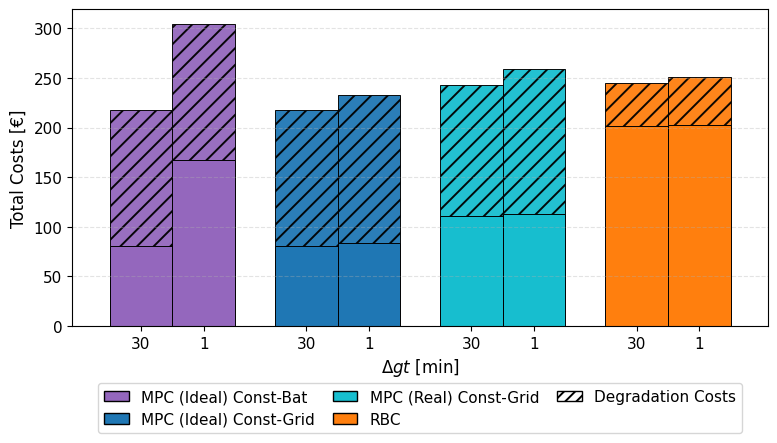

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math

def plot_two_df_stacked_costs(
    df_left: pd.DataFrame,
    df_right: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(8, 6), # 10, 4.5 for right side legend
):
    # Use model as index
    L = df_left.set_index("model").copy()
    R = df_right.set_index("model").copy()

    # If ideal_rule_constGrid is missing, clone from ideal (for BOTH frames if possible)
    if "ideal_rule_constGrid" in models_to_plot:
        if ("ideal_rule_constGrid" not in L.index) and ("ideal" in L.index):
            L.loc["ideal_rule_constGrid"] = L.loc["ideal"]
        if ("ideal_rule_constGrid" not in R.index) and ("ideal" in R.index):
            R.loc["ideal_rule_constGrid"] = R.loc["ideal"]

    # Ensure all models exist in both frames
    missing = [m for m in models_to_plot if m not in L.index or m not in R.index]
    if missing:
        raise ValueError(f"Model(s) missing in one of the dataframes: {missing}")

    # Styling
    plt.rcParams.update({
        "axes.labelsize": 12,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        "hatch.linewidth": 1.4,
    })

    model_colors = {
        "ideal":                   "#9467bd",
        "ideal_rule":              "#8c564b",
        "mpc_det_rule":            "#2ca02c",
        "mpc_det_rule_constGrid":  "#17becf",
        "rule-based":              "#ff7f0e",
        "ideal_rule_constGrid":    "#1f77b4",
    }

    n = len(models_to_plot)
    x = np.arange(n, dtype=float)
    width = 0.38
    pos_left  = x - width/2
    pos_right = x + width/2

    fig, ax = plt.subplots(figsize=figsize)

    # Bars
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")

        btm_L = float(L.loc[m, bottom_col]); top_L = float(L.loc[m, top_col])
        ax.bar(pos_left[i],  btm_L, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(pos_left[i],  top_L, width, bottom=btm_L, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)

        btm_R = float(R.loc[m, bottom_col]); top_R = float(R.loc[m, top_col])
        ax.bar(pos_right[i], btm_R, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(pos_right[i], top_R, width, bottom=btm_R, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)

    # One tick per bar: l/r
    ticks   = [p for pair in zip(pos_left, pos_right) for p in pair]
    labels  = [lab for _ in range(n) for lab in ("30", "1")]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    ax.margins(x=0.06)

    # Legend outside right: model colors + hatched degradation item
    # Change the name of the models in the legend
    model_legend = {
        "ideal":                   "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid":  "MPC (Real) Const-Grid",
        "rule-based":              "RBC",
        "ideal_rule_constGrid":    "MPC (Ideal) Const-Grid",
    }

    model_patches = [Patch(facecolor=model_colors.get(m, "#777777"),
                           edgecolor="black", label=model_legend.get(m, m)) for m in models_to_plot]
    deg_patch = Patch(facecolor="white", edgecolor="black", hatch="///",
                      label="Degradation Costs")


    # ---- Legend below, centered in two rows ----
    handles = model_patches + [deg_patch]

    # two rows ⇒ columns = ceil(len(handles)/2)
    import math
    ncols = math.ceil(len(handles) / 2)

    leg = ax.legend(
        handles=handles,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.18),   # push below the axes
        ncol=ncols,
        frameon=True,
        borderaxespad=0.0,
        handlelength=1.6,
        columnspacing=1.2
    )
    leg.get_title().set_multialignment('center')
    # Make room at the bottom for the legend (no right padding needed anymore)
    plt.tight_layout(rect=[0, 0.2, 1, 1])


    # LEGEND ON THE RIGHT
    # handles = model_patches + [deg_patch]
    # ax.legend(handles=handles, loc="upper left",
    #           bbox_to_anchor=(1.02, 0.65), borderaxespad=0.)
    # # Make room for the outside legend
    # plt.tight_layout(rect=[0, 0.1, 0.82, 1])

    ax.set_xlabel(r"$\Delta gt$ [min]")
    return fig, ax
models = ("ideal", "ideal_rule_constGrid", "mpc_det_rule_constGrid", "rule-based")

fig, ax = plot_two_df_stacked_costs(mref30_gt30_c8.leaderboard_mean(), mref30_gt1_c8.leaderboard_mean(), models_to_plot=models)
# save the figure
fig.savefig("costs_f30_v2.pdf", bbox_inches="tight")
plt.show()

In [48]:
models = ["ideal", "rule-based", "mpc_det_rule_constGrid"]
pvt = mref60_gt60_c8.pivot(models=models, value="net_cost_final")
# now get the ranking of each model for each SFH
for model in models:
    # now check if model is best (rank 1), 2nd best (rank 2), etc. and add a new column with the rank
    rank = 1

    # for each sfh check if model is better than m
    for sfh in pvt.index:
            for m in models:
                if m == model:
                    continue
            if pvt[model].loc[sfh].values > pvt[m].loc[sfh].values:
                rank += 1
        pvt[model + '_rank'].loc[sfh] = rank

    # alternative using pandas rank function

    
    
    #pvt[model + '_rank'] = pvt[model].rank(ascending=True)
    
pvt

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [44]:
pvt["ideal"].loc["SFH3"].values

array([135.62293175])

In [16]:
def get_ranking(mre, models, value="net_cost_final"):
    pvt = mre.pivot(models=models, value=value)
    
    ranks = pvt.rank(axis=1, ascending=True, method='min').astype(int).add_suffix('_rank')
    return pd.concat([pvt, ranks], axis=1)

rank_f60_gt60_c8 = get_ranking(mref60_gt60_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])
rank_f30_gt30_c8 = get_ranking(mref30_gt30_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])
rank_f15_gt15_c8 = get_ranking(mref15_gt15_c8, models=["ideal", "rule-based", "mpc_det_rule_constGrid"])

print("Ranking f60-gt60-c8 Mean Ranks: ", rank_f60_gt60_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f30-gt30-c8 Mean Ranks: ", rank_f30_gt30_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f15-gt15-c8 Mean Ranks: ", rank_f15_gt15_c8[['ideal_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())

print("\n\n")

rank_f60_gt1_c8 = get_ranking(mref60_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])
rank_f30_gt1_c8 = get_ranking(mref30_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])
rank_f15_gt1_c8 = get_ranking(mref15_gt1_c8, models=["ideal", "ideal_rule_constGrid", "rule-based", "mpc_det_rule_constGrid"])

print("Ranking f60-gt1-c8 Mean Ranks: ", rank_f60_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f30-gt1-c8 Mean Ranks: ", rank_f30_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())
print("Ranking f15-gt1-c8 Mean Ranks: ", rank_f15_gt1_c8[['ideal_rank', 'ideal_rule_constGrid_rank', 'rule-based_rank', 'mpc_det_rule_constGrid_rank']].mean().to_dict())

Ranking f60-gt60-c8 Mean Ranks:  {('ideal_rank', '60_rank'): 1.0, ('rule-based_rank', '60_rank'): 2.2666666666666666, ('mpc_det_rule_constGrid_rank', '60_rank'): 2.7333333333333334}
Ranking f30-gt30-c8 Mean Ranks:  {('ideal_rank', '30_rank'): 1.0, ('rule-based_rank', '30_rank'): 2.6, ('mpc_det_rule_constGrid_rank', '30_rank'): 2.4}
Ranking f15-gt15-c8 Mean Ranks:  {('ideal_rank', '15_rank'): 1.0, ('rule-based_rank', '15_rank'): 2.466666666666667, ('mpc_det_rule_constGrid_rank', '15_rank'): 2.533333333333333}



Ranking f60-gt1-c8 Mean Ranks:  {('ideal_rank', '60_rank'): 4.0, ('ideal_rule_constGrid_rank', '60_rank'): 1.2, ('rule-based_rank', '60_rank'): 1.9333333333333333, ('mpc_det_rule_constGrid_rank', '60_rank'): 2.8666666666666667}
Ranking f30-gt1-c8 Mean Ranks:  {('ideal_rank', '30_rank'): 4.0, ('ideal_rule_constGrid_rank', '30_rank'): 1.0666666666666667, ('rule-based_rank', '30_rank'): 2.066666666666667, ('mpc_det_rule_constGrid_rank', '30_rank'): 2.8666666666666667}
Ranking f15-g

In [ ]:
rank_f60_gt1

NameError: name 'mref60_gt60_c8' is not defined

In [53]:
# Pivot so rows = SFH, columns = model, values = net_cost_final
# pvt = (
#     mref60_gt60_c8
#     .pivot(index="sfh", columns="model", values="net_cost_final")
#     .reindex(columns=["ideal", "rule-based", "mpc_det_rule_constGrid"])  # keep your order
# )

pvt = mref60_gt60_c8.pivot(models=models, value="net_cost_final")

# Rank per SFH (smaller cost ⇒ better ⇒ rank 1). Choose tie handling:
# method="min"  -> ties share the lowest rank number (1,1,3,…)
# method="dense"-> ties share rank and next rank increments by 1 (1,1,2,…)
ranks = pvt.rank(axis=1, ascending=True, method="min").astype(int).add_suffix("_rank")

# If you want both the raw costs and the ranks together:
pvt_with_ranks = pd.concat([pvt, ranks], axis=1)
pvt_with_ranks

pvt_with_ranks.mean().sort_values()  # average rank per model


model                        freq   
ideal_rank                   60_rank      1.000000
rule-based_rank              60_rank      2.266667
mpc_det_rule_constGrid_rank  60_rank      2.733333
ideal                        60         210.619713
rule-based                   60         241.933782
mpc_det_rule_constGrid       60         247.200444
dtype: float64

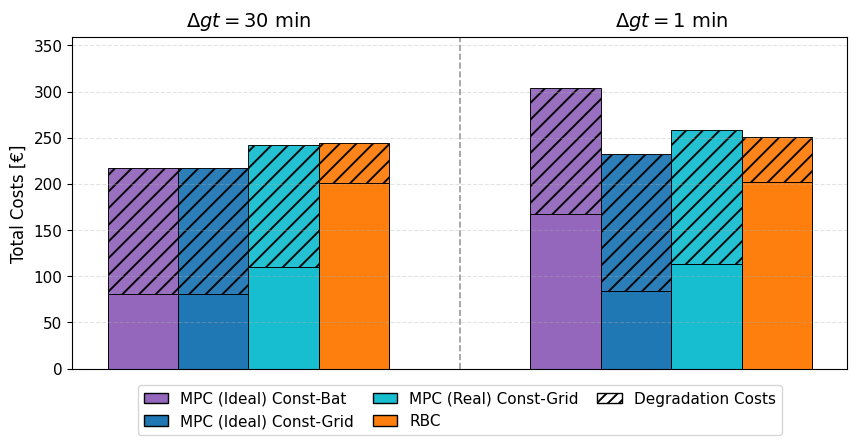

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_split_stacked_costs(
    df_left: pd.DataFrame,
    df_right: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    left_title="Dataset A",
    right_title="Dataset B",
    figsize=(10, 4.8),
    block_gap=1.0,                   # gap between LEFT and RIGHT blocks only
):
    # Use model as index
    L = df_left.set_index("model")
    R = df_right.set_index("model")

    # If ideal_rule_constGrid is missing, clone from ideal (for BOTH frames if possible)
    if "ideal_rule_constGrid" in models_to_plot:
        if ("ideal_rule_constGrid" not in L.index) and ("ideal" in L.index):
            L.loc["ideal_rule_constGrid"] = L.loc["ideal"]
        if ("ideal_rule_constGrid" not in R.index) and ("ideal" in R.index):
            R.loc["ideal_rule_constGrid"] = R.loc["ideal"]

    # Ensure all models exist in both frames
    missing = [m for m in models_to_plot if m not in L.index or m not in R.index]
    if missing:
        raise ValueError(f"Model(s) missing in one of the dataframes: {missing}")


    plt.rcParams.update({
        "axes.labelsize": 12,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        "hatch.linewidth": 1.4,
    })

    model_colors = {
        "ideal":                   "#9467bd",
        "ideal_rule":              "#8c564b",
        "mpc_det_rule":            "#2ca02c",
        "mpc_det_rule_constGrid":  "#17becf",
        "rule-based":              "#ff7f0e",
        "ideal_rule_constGrid":    "#1f77b4",
    }
    fig, ax = plt.subplots(figsize=figsize)


    n = len(models_to_plot)
    # --- Layout: narrower bars that still TOUCH within each side ---
    width = 0.5                          # bar width
    step  = width                        # center-to-center spacing so bars touch
    x_left  = np.arange(n) * step
    x_right = n * step + block_gap + np.arange(n) * step



    # tight x-limits (no side padding)
    ax.set_xlim(-width/2, x_right[-1] + width/2)
    ax.margins(x=0)


    ymax = 0.0
    # LEFT block
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")
        btm = float(L.loc[m, bottom_col])
        top = float(L.loc[m, top_col])

        ax.bar(x_left[i], btm, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(x_left[i], top,  width, bottom=btm, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)
        ymax = max(ymax, btm + top)

    # RIGHT block
    for i, m in enumerate(models_to_plot):
        c = model_colors.get(m, "#777777")
        btm = float(R.loc[m, bottom_col])
        top = float(R.loc[m, top_col])

        ax.bar(x_right[i], btm, width, color=c, edgecolor="black", linewidth=0.7)
        ax.bar(x_right[i], top,  width, bottom=btm, color=c,
               edgecolor="black", linewidth=0.7, hatch="//", alpha=0.95)
        ymax = max(ymax, btm + top)

    # # Separator line between blocks
    # sep_x = n - 0.5 + block_gap / 2
    # # fix separator line position to account for bar width
    # sep_x += width / 2

    # separator exactly between the two blocks in data coords
    sep_x = n * step + block_gap / 4
    ax.axvline(sep_x, color="gray", linestyle="--", linewidth=1.2, alpha=0.8)

    # X ticks & labels
    xticks = np.concatenate([x_left, x_right])
    xticklabels = list(models_to_plot) + list(models_to_plot)
    #ax.set_xticks(xticks)
    # set no x ticks
    ax.set_xticks([])

    #ax.set_xticklabels(xticklabels, rotation=0)

    # Tight x-limits so bars have no side padding
    ax.set_xlim(-0.5, x_right[-1] + 0.5)         # CHANGED
    ax.margins(x=0)                               # CHANGED

    # Axis label & grid
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    ax.set_ylim(top=ymax + 0.18 * ymax)

    # # Legend above the axes (won’t collide with titles)
    # model_patches = [Patch(facecolor=model_colors.get(m, "#777777"),
    #                        edgecolor="black", label=m) for m in models_to_plot]
    # comp_elec = Patch(facecolor="white", edgecolor="black", label="Electricity Costs")
    # comp_deg  = Patch(facecolor="white", edgecolor="black", hatch="///", label="Degradation Costs")
    # handles = model_patches + [comp_elec, comp_deg]

    # ax.legend(handles=handles, ncol=2, frameon=True, loc="upper left",
    #           bbox_to_anchor=(0.0, 1.18))        # CHANGED: push legend into top margin
    

   # Legend items
    # Change the name of the models in the legend
    model_legend = {
        "ideal":                   "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid":  "MPC (Real) Const-Grid",
        "rule-based":              "RBC",
        "ideal_rule_constGrid":    "MPC (Ideal) Const-Grid",
    }
    model_patches = [Patch(facecolor=model_colors.get(m, "#777777"),
                           edgecolor="black", label=model_legend.get(m, m)) for m in models_to_plot]
    #comp_elec = None#Patch(facecolor="white", edgecolor="black", label="Electricity Costs")
    comp_deg  = Patch(facecolor="white", edgecolor="black", hatch="///", label="Degradation Costs")
    #handles = model_patches + [comp_elec, comp_deg]
    handles = model_patches + [comp_deg]

    # ---- Legend below, centered in two rows ----
    ncols = math.ceil(len(handles) / 2)
    ax.legend(
        handles=handles,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.05),  # push below axes
        ncol=ncols,
        frameon=True,
        borderaxespad=0.0,
        handlelength=1.6,
        columnspacing=1.2
    )

    # --- Put the left/right titles OUTSIDE the plot area, like a figure title ---
    # Reserve more top margin for the headers:
    fig.subplots_adjust(top=0.8)                 # CHANGED

    # Compute centers in figure fraction and place texts high, like titles
    fig_bb = ax.get_position()
    xmin, xmax = ax.get_xlim()
    to_ax = lambda x: (x - xmin) / (xmax - xmin)

    left_center_fig_x  = fig_bb.x0 + to_ax(x_left.mean())  * fig_bb.width
    right_center_fig_x = fig_bb.x0 + to_ax(x_right.mean()) * fig_bb.width

    title_y = 0.81                                 # CHANGED: “title-like” height
    fig.text(left_center_fig_x,  title_y, left_title,
             ha="center", va="bottom", fontsize=14, fontweight="bold")
    fig.text(right_center_fig_x, title_y, right_title,
             ha="center", va="bottom", fontsize=14, fontweight="bold")

    return fig, ax


fig, ax = plot_split_stacked_costs(
    mref30_gt30_c8.leaderboard_mean(), mref30_gt1_c8.leaderboard_mean(),
    models_to_plot = ("ideal", "ideal_rule_constGrid", "mpc_det_rule_constGrid", "rule-based"),
    left_title=r"$\Delta gt = 30 \ \text{min}$",
    right_title=r"$\Delta gt = 1 \ \text{min}$",
    block_gap=1.0,
)
#fig.savefig("costs_f30_split_v1.pdf", bbox_inches="tight")
plt.show()

In [ ]:
# PAPER PLOT NUMERO 2

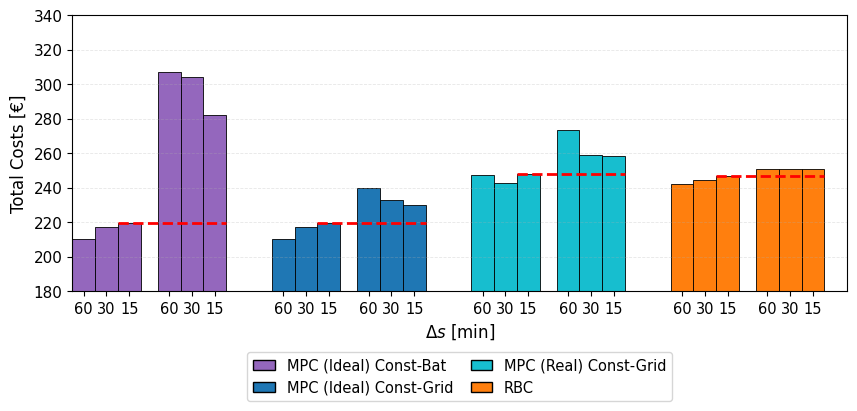

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math

def plot_two_groups_per_model_total_costs(
    df_60_60: pd.DataFrame,
    df_60_1: pd.DataFrame,
    df_30_30: pd.DataFrame,
    df_30_1: pd.DataFrame,
    df_15_15: pd.DataFrame,
    df_15_1: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule_constGrid"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(10, 4.6),
    subgap=0.35,   # gap between the two mini-groups within a model
    model_gap=0.9, # gap between different models
    bar_width=0.26 # thin bars; bars inside each mini-group touch
):
    # Index by model for quick lookup
    D = {
        ("60","left"): df_60_60.set_index("model"),
        ("60","right"): df_60_1.set_index("model"),
        ("30","left"): df_30_30.set_index("model"),
        ("30","right"): df_30_1.set_index("model"),
        ("15","left"): df_15_15.set_index("model"),
        ("15","right"): df_15_1.set_index("model"),
    }


    # For all the lefts in D, add missing ideal_rule_constGrid with copied values from ideal
    for f in ("60","30","15"):
        for side in ("left","right"):
            df = D[(f,side)]
            if "ideal_rule_constGrid" in models_to_plot:
                if ("ideal_rule_constGrid" not in df.index) and ("ideal" in df.index):
                    df.loc["ideal_rule_constGrid"] = df.loc["ideal"]



    # if "ideal_rule_constGrid" in models_to_plot:
    #     if ("ideal_rule_constGrid" not in L.index) and ("ideal" in L.index):
    #         L.loc["ideal_rule_constGrid"] = L.loc["ideal"]
    #     if ("ideal_rule_constGrid" not in R.index) and ("ideal" in R.index):
    #         R.loc["ideal_rule_constGrid"] = R.loc["ideal"]
    # Validate presence
    missing = [m for m in models_to_plot
               if any(m not in D[(f,side)].index for f in ("60","30","15") for side in ("left","right"))]
    if missing:
        raise ValueError(f"Model(s) missing in one or more dataframes: {missing}")

    # Same color for all 6 bars of a model
    model_colors = {
        "ideal":                   "#9467bd",
        "ideal_rule":              "#8c564b",
        "mpc_det_rule":            "#2ca02c",
        "mpc_det_rule_constGrid":  "#17becf",
        "rule-based":              "#ff7f0e",
        "ideal_rule_constGrid":    "#1f77b4",
    }

    plt.rcParams.update({
        "axes.labelsize": 12,
        "xtick.labelsize": 10.5,
        "ytick.labelsize": 11,
        "legend.fontsize": 10.5,
        "hatch.linewidth": 1.4,
    })

    fig, ax = plt.subplots(figsize=figsize)

    order = ("60","30","15")
    n_models = len(models_to_plot)

    # Layout so bars touch within mini-groups
    step = bar_width
    group_span = 3 * step                  # 60,30,15
    block_span = group_span + subgap + group_span
    x0 = 0.0

    # Build positions: list of (x, model, freq, side)
    x_positions = []
    for model in models_to_plot:
        # left mini-group (gt60/30/15)
        for j, f in enumerate(order):
            x_positions.append((x0 + j*step, model, f, "left"))
        # right mini-group (gt1 counterparts)
        right_start = x0 + group_span + subgap
        for j, f in enumerate(order):
            x_positions.append((right_start + j*step, model, f, "right"))
        x0 += block_span + model_gap

    # Draw bars
    ymax = 0.0
    ymin = 0.0
    for x, model, f, side in x_positions:
        c = model_colors.get(model, "#777")
        df = D[(f, side)]
        total = float(df.loc[model, bottom_col]) + float(df.loc[model, top_col])
        ax.bar(x, total, bar_width, color=c, edgecolor="black", linewidth=0.6)
        ymax = max(ymax, total)
        ymin = min(ymin, total)

    # --- Horizontal dashed red lines from 15-gt15 to end of 15-gt1 per model ---
    # Build quick lookups for the x of the 15-bars
    x_15_left  = {model: x for (x, model, f, side) in x_positions if f == "15" and side == "left"}
    x_15_right = {model: x for (x, model, f, side) in x_positions if f == "15" and side == "right"}

    for model in models_to_plot:
        # y at the top of the 15-gt15 bar (total cost)
        y_left15 = float(D[("15","left")].loc[model, bottom_col]) + float(D[("15","left")].loc[model, top_col])

        # span: from start edge of left 15-bar to end edge of right 15-bar
        x_start = x_15_left[model]  - bar_width/2
        x_end   = x_15_right[model] + bar_width/2

        ax.hlines(y_left15, x_start, x_end, colors="red", linestyles="--", linewidth=2, alpha=1.0)


    # Y axis & grid
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.3, linewidth=0.6)

    # ---- X ticks: one per bar, labeled 60/30/15 (no model names, no xlabel) ----
    xticks = [xp[0] for xp in x_positions]
    xticklabels = [xp[2] for xp in x_positions]  # the 'freq' string: "60" / "30" / "15"
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    # Tight limits
    ax.set_xlim(-bar_width/2, x0 - model_gap + bar_width/2)
    #ax.set_ylim(180, ymax * 1.05)
    ax.set_ylim(180, 340)

    # Optional faint separators between the two mini-groups per model
    x_cursor = 0.0
    for _ in models_to_plot:
        sep_x = x_cursor + group_span + subgap/2
        #ax.axvline(sep_x, color="gray", linestyle="--", linewidth=1.0, alpha=0.35)
        x_cursor += block_span + model_gap

    model_legend = {
            "ideal":                   "MPC (Ideal) Const-Bat",
            "mpc_det_rule_constGrid":  "MPC (Real) Const-Grid",
            "rule-based":              "RBC",
            "ideal_rule_constGrid":    "MPC (Ideal) Const-Grid",
        }
    # Legend at the bottom (colors = models)
    patches = [Patch(facecolor=model_colors.get(m, "#777"), edgecolor="black", label=model_legend.get(m, m))
               for m in models_to_plot]
    ncols = math.ceil(len(patches) / 2)
    ax.legend(
        handles=patches,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.22),
        ncol=ncols,
        frameon=True,
        borderaxespad=0.0,
        handlelength=1.5,
        columnspacing=1.2
    )

    fig.subplots_adjust(bottom=0.28)  # room for legend

    ax.set_xlabel(r"$\Delta s$ [min]")

    return fig, ax

fig, ax = plot_two_groups_per_model_total_costs(
    mref60_gt60_c8.leaderboard_mean(),  # df_60_60
    mref60_gt1_c8.leaderboard_mean(),   # df_60_1
    mref30_gt30_c8.leaderboard_mean(),  # df_30_30
    mref30_gt1_c8.leaderboard_mean(),   # df_30_1
    mref15_gt15_c8.leaderboard_mean(),  # df_15_15
    mref15_gt1_c8.leaderboard_mean(),   # df_15_1
    models_to_plot=("ideal", "ideal_rule_constGrid", "mpc_det_rule_constGrid", "rule-based"),
    bar_width=0.4,  # make them thin
    subgap=0.3,
    model_gap=0.8,
)
#fig.savefig("costs_all_freqs_v1.pdf", bbox_inches="tight")
plt.show()


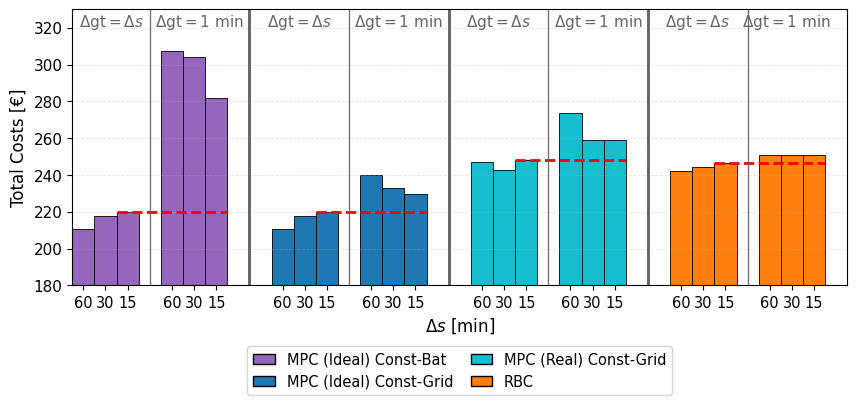

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import math

def plot_two_groups_per_model_total_costs(
    df_60_60: pd.DataFrame,
    df_60_1: pd.DataFrame,
    df_30_30: pd.DataFrame,
    df_30_1: pd.DataFrame,
    df_15_15: pd.DataFrame,
    df_15_1: pd.DataFrame,
    models_to_plot=("ideal", "rule-based", "mpc_det_rule_constGrid"),
    bottom_col="net_cost_adj",
    top_col="e_battery_deg_costs",
    figsize=(10, 4.6),
    subgap=0.35,
    model_gap=0.9,
    bar_width=0.26,
    # --- NEW: headers & separators ---
    f30_header_frac_y=0.92,  # height as FRACTION of y-axis (0..1) so all texts align
    f30_header_color="#666666",
    f30_left_text=r"$\Delta \mathrm{gt}=\Delta s$",
    f30_right_text=r"$\Delta \mathrm{gt}=1\ \mathrm{min}$",
    inner_sep_color="#666666",
    inner_sep_lw=0.9,
    block_sep_lw=2.0,
):
    # Index by model for quick lookup
    D = {
        ("60","left"): df_60_60.set_index("model"),
        ("60","right"): df_60_1.set_index("model"),
        ("30","left"): df_30_30.set_index("model"),
        ("30","right"): df_30_1.set_index("model"),
        ("15","left"): df_15_15.set_index("model"),
        ("15","right"): df_15_1.set_index("model"),
    }

    # clone ideal -> ideal_rule_constGrid if missing
    for f in ("60","30","15"):
        for side in ("left","right"):
            df = D[(f,side)]
            if "ideal_rule_constGrid" in models_to_plot:
                if ("ideal_rule_constGrid" not in df.index) and ("ideal" in df.index):
                    df.loc["ideal_rule_constGrid"] = df.loc["ideal"]

    # presence check
    missing = [m for m in models_to_plot
               if any(m not in D[(f,side)].index for f in ("60","30","15") for side in ("left","right"))]
    if missing:
        raise ValueError(f"Model(s) missing in one or more dataframes: {missing}")

    model_colors = {
        "ideal":                   "#9467bd",
        "ideal_rule":              "#8c564b",
        "mpc_det_rule":            "#2ca02c",
        "mpc_det_rule_constGrid":  "#17becf",
        "rule-based":              "#ff7f0e",
        "ideal_rule_constGrid":    "#1f77b4",
    }

    plt.rcParams.update({
        "axes.labelsize": 12, "xtick.labelsize": 10.5, "ytick.labelsize": 11,
        "legend.fontsize": 10.5, "hatch.linewidth": 1.4,
    })

    fig, ax = plt.subplots(figsize=figsize)

    order = ("60","30","15")

    # layout (bars touch within groups)
    step = bar_width
    group_span = 3 * step
    block_span = group_span + subgap + group_span
    x0 = 0.0

    # positions: list of (x, model, freq, side)
    x_positions = []
    for model in models_to_plot:
        for j, f in enumerate(order):                        # left mini-group
            x_positions.append((x0 + j*step, model, f, "left"))
        right_start = x0 + group_span + subgap               # right mini-group
        for j, f in enumerate(order):
            x_positions.append((right_start + j*step, model, f, "right"))
        x0 += block_span + model_gap

    # draw bars
    ymax = 0.0
    for x, model, f, side in x_positions:
        c = model_colors.get(model, "#777")
        df = D[(f, side)]
        total = float(df.loc[model, bottom_col]) + float(df.loc[model, top_col])
        ax.bar(x, total, bar_width, color=c, edgecolor="black", linewidth=0.6)
        ymax = max(ymax, total)

    # dashed red lines from 15-gt15 to end of 15-gt1 per model
    x_15_left  = {model: x for (x, model, f, side) in x_positions if f == "15" and side == "left"}
    x_15_right = {model: x for (x, model, f, side) in x_positions if f == "15" and side == "right"}
    for model in models_to_plot:
        y_left15 = float(D[("15","left")].loc[model, bottom_col]) + float(D[("15","left")].loc[model, top_col])
        ax.hlines(y_left15,
                  x_15_left[model]  - bar_width/2,
                  x_15_right[model] + bar_width/2,
                  colors="red", linestyles="--", linewidth=2, alpha=1.0)

    # axes cosmetics
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.3, linewidth=0.6)
    xticks = [xp[0] for xp in x_positions]
    ax.set_xticks(xticks)
    ax.set_xticklabels([xp[2] for xp in x_positions])  # "60/30/15"
    ax.set_xlim(-bar_width/2, x0 - model_gap + bar_width/2)
    ax.set_ylim(180, 330)
        

    # ---------- Headers centered between grey lines + separators ----------
    # Build per-model x lists (sorted)
    by_model = {m: sorted([x for (x, mm, _, __) in x_positions if mm == m])
                for m in models_to_plot}

    # Thick separators (between model blocks)
    block_seps = []
    for i in range(len(models_to_plot) - 1):
        xs_left  = by_model[models_to_plot[i]]
        xs_right = by_model[models_to_plot[i+1]]
        end_curr   = xs_left[-1]  + bar_width/2
        start_next = xs_right[0]  - bar_width/2
        block_seps.append(0.5 * (end_curr + start_next))

    # Header y-position (same for all), as fraction of y-range
    y_min, y_max = ax.get_ylim()
    y_hdr = y_min + f30_header_frac_y * (y_max - y_min)

    for i, model in enumerate(models_to_plot):
        xs = by_model[model]
        # thin inner separator between the two 3-bar groups
        x_mid = 0.5 * (xs[2] + xs[3])
        ax.axvline(x_mid, color=inner_sep_color, linewidth=inner_sep_lw, alpha=0.7)

        # bounds to the left/right thick separators (or block edges for first/last model)
        left_bound  = block_seps[i-1] if i > 0 else xs[0]  - bar_width/2
        right_bound = block_seps[i]   if i < len(models_to_plot)-1 else xs[-1] + bar_width/2

        # centers between thick↔thin and thin↔thick
        x_center_left  = 0.5 * (left_bound + x_mid)
        x_center_right = 0.5 * (x_mid + right_bound)

        # place texts
        ax.text(x_center_left,  y_hdr, f30_left_text,
                ha="center", va="bottom", fontsize=11, color=f30_header_color)
        ax.text(x_center_right, y_hdr, f30_right_text,
                ha="center", va="bottom", fontsize=11, color=f30_header_color)

    # draw thick separators last (between models)
    for x_sep in block_seps:
        ax.axvline(x_sep, color=inner_sep_color, linewidth=block_sep_lw, alpha=0.9)


    # ---------- NEW: vertical separators ----------
    # 1) thin separators BETWEEN the 6 bins within each model block
    # group bars per model, sorted by x, then draw lines at midpoints
    by_model = {}
    for x, model, f, side in x_positions:
        by_model.setdefault(model, []).append(x)
    for model, xs in by_model.items():
        xs = sorted(xs)
        x_mid = 0.5 * (xs[2] + xs[3])  # between the two groups
        ax.axvline(x_mid, color=inner_sep_color, linewidth=inner_sep_lw, alpha=0.7)


    # 2) thicker separators BETWEEN model blocks
    # boundary = midpoint between end of current block and start of next block
    models = list(models_to_plot)
    for i in range(len(models) - 1):
        xs_left  = sorted(by_model[models[i]])
        xs_right = sorted(by_model[models[i+1]])
        end_curr   = xs_left[-1]  + bar_width/2
        start_next = xs_right[0]  - bar_width/2
        x_mid = 0.5 * (end_curr + start_next)
        ax.axvline(x_mid, color=inner_sep_color, linewidth=block_sep_lw, alpha=0.9)

    # legend (your existing block can remain)
    model_legend = {
        "ideal": "MPC (Ideal) Const-Bat",
        "mpc_det_rule_constGrid": "MPC (Real) Const-Grid",
        "rule-based": "RBC",
        "ideal_rule_constGrid": "MPC (Ideal) Const-Grid",
    }
    patches = [Patch(facecolor=model_colors.get(m, "#777"), edgecolor="black",
                     label=model_legend.get(m, m)) for m in models_to_plot]
    ncols = math.ceil(len(patches) / 2)
    ax.legend(handles=patches, loc="upper center", bbox_to_anchor=(0.5, -0.22),
              ncol=ncols, frameon=True, borderaxespad=0.0, handlelength=1.5, columnspacing=1.2)

    fig.subplots_adjust(bottom=0.28)  # room for legend
    ax.set_xlabel(r"$\Delta s$ [min]")

    return fig, ax
fig, ax = plot_two_groups_per_model_total_costs(
    mref60_gt60_c8.leaderboard_mean(),  # df_60_60
    mref60_gt1_c8.leaderboard_mean(),   # df_60_1
    mref30_gt30_c8.leaderboard_mean(),  # df_30_30
    mref30_gt1_c8.leaderboard_mean(),   # df_30_1
    mref15_gt15_c8.leaderboard_mean(),  # df_15_15
    mref15_gt1_c8.leaderboard_mean(),   # df_15_1
    models_to_plot=("ideal", "ideal_rule_constGrid", "mpc_det_rule_constGrid", "rule-based"),
    bar_width=0.4,  # make them thin
    subgap=0.4,
    model_gap=0.8,
)
#fig.savefig("costs_all_freqs_v1.pdf", bbox_inches="tight")
plt.show()

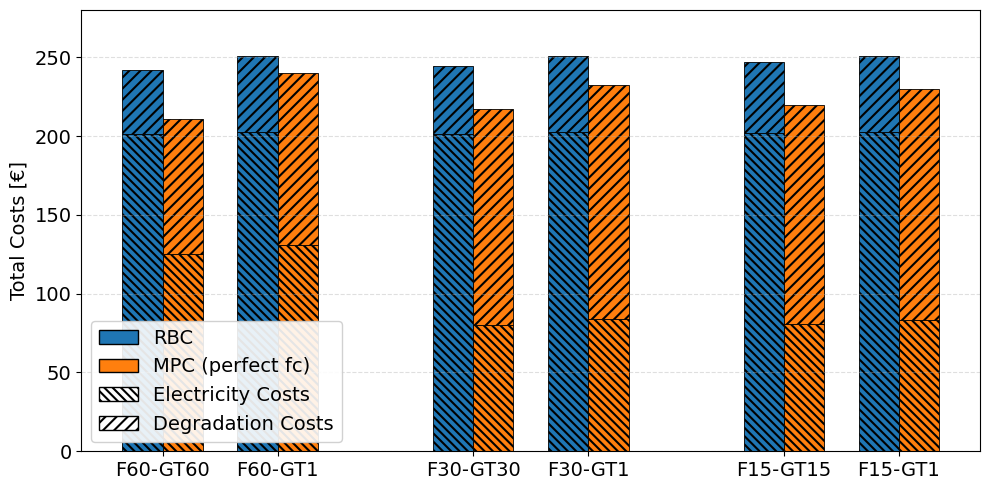

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_grouped_stacked_costs_pretty(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal_rule_constGrid"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    figsize=(10, 5),
    gap_after_every=2,               # add space after each pair of bars
    gap_size=0.7,                    # how much extra space to add
):
    """
    Grouped (6) x stacked (2 components) bar chart.
    - Color encodes model (RBC vs MPC)
    - Hatch encodes component (Electricity vs Degradation)
    - One legend (RBC, MPC, Electricity Costs, Degradation Costs)
    - Extra spacing after every 'gap_after_every' bars (default=2) to form 3 visual groups.
    """
    fontsize=14
    plt.rcParams.update({
        "axes.titlesize": fontsize,
        "axes.labelsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fontsize": fontsize,
    })
    # colors by model
    model_colors = {
        "rule-based": "#1f76b4",            # RBC
        "ideal": "#ff7f0e",                 # MPC
        "ideal_rule_constGrid": "#ff7f0e",
    }

    # hatches by component
    hatch_bottom = r"\\\\"   # Electricity
    hatch_top    = r"///"    # Degradation
    plt.rcParams["hatch.linewidth"] = 1.5

    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    # base x positions 0..N-1, then add gaps after every 'gap_after_every' bars
    base = np.arange(n_groups, dtype=float)
    extra = np.floor_divide(base, gap_after_every) * gap_size
    x = base + extra

    width = 0.35
    offsets = (-width/2, width/2)  # left/right bar within each small pair

    fig, ax = plt.subplots(figsize=figsize)

    for i, df in enumerate(dfs):
        df_use = df.set_index("model") if "model" in df.columns else df
        for j, model in enumerate(models):
            m = model
            if m == "ideal_rule_constGrid" and m not in df_use.index:
                m = "ideal"
            if m not in df_use.index:
                raise KeyError(f"Model '{model}' not found in dataframe #{i}.")

            btm = float(df_use.loc[m, bottom_col])  # electricity
            top = float(df_use.loc[m, top_col])     # degradation
            xpos = x[i] + offsets[j]
            face = model_colors.get(m, "#777777")

            # bottom: electricity
            ax.bar(
                xpos, btm, width,
                color=face, edgecolor="black", linewidth=0.6, hatch=hatch_bottom
            )
            # top: degradation
            ax.bar(
                xpos, top, width,
                bottom=btm, color=face, edgecolor="black", linewidth=0.6, hatch=hatch_top
            )

    # ticks/labels
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, rotation=0)
    #ax.set_xlabel("Group")
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # ---- single legend (RBC, MPC, Electricity Costs, Degradation Costs) ----
    # proxies for models (color)
    h_rbc = Patch(facecolor=model_colors["rule-based"], edgecolor="black", label="RBC")
    h_mpc = Patch(facecolor=model_colors["ideal"],      edgecolor="black", label="MPC (perfect fc)")
    # proxies for components (hatch)
    h_elec = Patch(facecolor="white", edgecolor="black", hatch=hatch_bottom, label="Electricity Costs")
    h_deg  = Patch(facecolor="white", edgecolor="black", hatch=hatch_top,    label="Degradation Costs")

    # ax.legend(
    #     handles=[h_rbc, h_mpc, h_elec, h_deg],
    #     loc="upper left",            # inside the axes
    #     bbox_to_anchor=(0.02, 0.98),
    #     frameon=True
    # )
    ax.legend(handles=[h_rbc, h_mpc, h_elec, h_deg], loc="lower left", framealpha=0.9)
    plt.ylim(bottom=0, top=280)
    fontsize=12



    plt.tight_layout()
    return fig, ax

fig, ax = plot_grouped_stacked_costs_pretty(
    [
        mref60_gt60_c8.leaderboard_mean(),
        mref60_gt1_c8.leaderboard_mean(),
        mref30_gt30_c8.leaderboard_mean(),
        mref30_gt1_c8.leaderboard_mean(),
        mref15_gt15_c8.leaderboard_mean(),
        mref15_gt1_c8.leaderboard_mean(),
    ],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
)
#plt.savefig("total-costs2.pdf", bbox_inches='tight')
plt.show()



In [26]:
mref30_gt30_c8.leaderboard_mean()

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
0,ideal,15,15,30.0,1181.40,249.13,1114.07,166.95,3338.25,1632.43,137.12,9.95,82.18,80.29,217.42,1.00
1,ideal_rule,15,15,30.0,1174.48,248.58,1106.77,165.64,3357.66,1641.95,137.92,9.94,82.95,81.06,218.98,2.00
2,mpc_det_rule_constGrid,15,15,30.0,1248.72,284.82,1185.80,172.93,3216.38,1573.70,132.19,8.01,111.89,110.37,242.56,3.53
3,rule-based,15,15,30.0,1135.01,322.61,1123.68,121.23,1042.86,512.74,43.07,0.32,201.38,201.32,244.39,4.00
4,mpc_det_rule,15,15,30.0,1262.52,291.46,1202.52,169.97,3078.52,1506.24,126.52,7.86,121.50,120.00,246.53,4.47


In [26]:
# create a dataframe that contains the mean values of all 6 experiments
#   
# 
summary_df = pd.concat([
    mref60_gt60_c8.leaderboard_mean().assign(experiment='f60-gt60-c8'),
    mref60_gt1_c8.leaderboard_mean().assign(experiment='f60-gt1-c8'),
    mref30_gt30_c8.leaderboard_mean().assign(experiment='f30-gt30-c8'),
    mref30_gt1_c8.leaderboard_mean().assign(experiment='f30-gt1-c8'),
    mref15_gt15_c8.leaderboard_mean().assign(experiment='f15-gt15-c8'),
    mref15_gt1_c8.leaderboard_mean().assign(experiment='f15-gt1-c8'),
], axis=0)
summary_df = summary_df.set_index('experiment')
summary_df

#summary_df.to_csv("summary_costs_c8.csv")

,model,runs,buildings,freq,e_import_total,import_cost,e_export_total,export_revenue,e_throughput,e_discharged_total,e_battery_deg_costs,e_end,net_cost,net_cost_adj,net_cost_final,avg_rank
experiment,,,,,,,,,,,,,,,,
f60-gt60-c8,ideal,15,15,60.0,1191.19,250.77,1149.04,123.78,2085.02,1018.41,85.55,10.08,126.99,125.07,210.62,1.00
f60-gt60-c8,ideal_rule,15,15,60.0,1184.86,250.81,1141.99,122.81,2125.66,1038.37,87.22,9.98,127.99,126.10,213.32,2.00
f60-gt60-c8,mpc_det_rule,15,15,60.0,1303.52,300.54,1267.08,137.28,1903.10,930.31,78.15,8.05,163.26,161.73,239.88,3.53
f60-gt60-c8,rule-based,15,15,60.0,1132.74,322.04,1122.48,120.93,989.77,486.73,40.89,0.32,201.11,201.05,241.93,3.80
f60-gt60-c8,mpc_det_rule_constGrid,15,15,60.0,1304.44,298.72,1262.46,138.74,2162.35,1057.16,88.80,8.35,159.98,158.40,247.20,4.67
f60-gt1-c8,ideal_rule,15,15,60.0,1255.59,275.95,1210.80,131.69,2219.43,1084.30,91.08,10.01,144.27,142.36,233.44,1.27
f60-gt1-c8,ideal_rule_constGrid,15,15,60.0,1207.75,256.79,1153.98,124.28,2664.88,1302.53,109.41,9.99,132.51,130.61,240.02,2.07
f60-gt1-c8,rule-based,15,15,60.0,1139.61,323.93,1125.71,121.54,1170.70,575.37,48.33,0.31,202.39,202.33,250.67,3.47
f60-gt1-c8,mpc_det_rule,15,15,60.0,1343.28,312.69,1305.08,142.20,1990.64,973.19,81.75,8.05,170.48,168.95,250.70,3.33


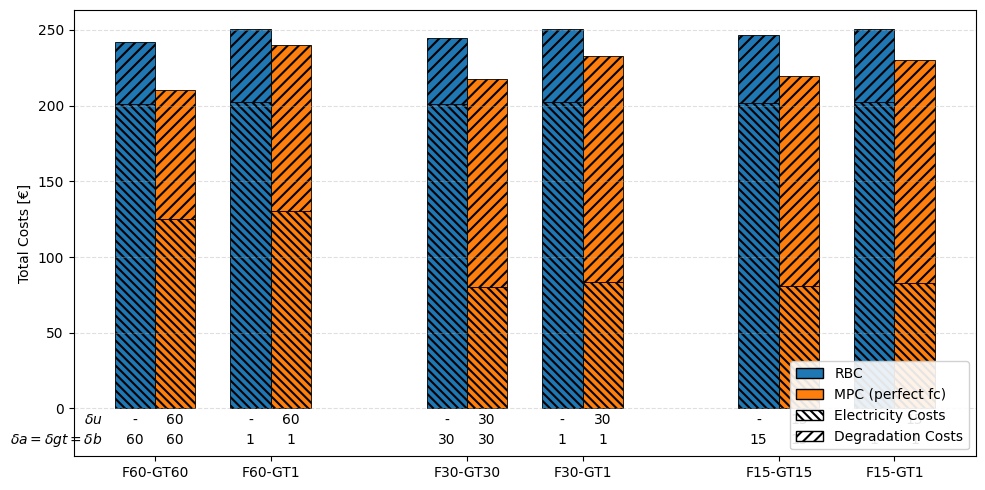

In [19]:
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_grouped_stacked_costs_pretty(
    dfs,
    group_labels=None,
    models=("rule-based", "ideal_rule_constGrid"),
    bottom_col="net_cost_adj",       # Electricity costs
    top_col="e_battery_deg_costs",   # Degradation costs
    figsize=(10, 5),
    gap_after_every=2,               # add space after each pair of bars
    gap_size=0.7,                    # how much extra space to add
):
    """
    Grouped (6) x stacked (2 components) bar chart.
    - Color encodes model (RBC vs MPC)
    - Hatch encodes component (Electricity vs Degradation)
    - One legend (RBC, MPC, Electricity Costs, Degradation Costs)
    - Extra spacing after every 'gap_after_every' bars (default=2) to form 3 visual groups.
    - Two-row 'mini table' under each bar with δu and δa=δgt=δb.
    """
    # colors by model
    model_colors = {
        "rule-based": "#1f77b4",            # RBC
        "ideal": "#ff7f0e",                 # MPC
        "ideal_rule_constGrid": "#ff7f0e",
    }

    # hatches by component
    hatch_bottom = r"\\\\"   # Electricity
    hatch_top    = r"///"    # Degradation
    plt.rcParams["hatch.linewidth"] = 1.5

    n_groups = len(dfs)
    if group_labels is None:
        group_labels = [f"G{i+1}" for i in range(n_groups)]
    assert len(group_labels) == n_groups, "group_labels length must match dfs length"

    # base x positions 0..N-1, then add gaps after every 'gap_after_every' bars
    base = np.arange(n_groups, dtype=float)
    extra = np.floor_divide(base, gap_after_every) * gap_size
    x = base + extra

    width = 0.35
    offsets = (-width/2, width/2)  # left/right bar within each small pair

    fig, ax = plt.subplots(figsize=figsize)

    # keep x positions of each individual bar in order (for annotation)
    bar_xpos = []
    bar_models = []

    for i, df in enumerate(dfs):
        df_use = df.set_index("model") if "model" in df.columns else df
        for j, model in enumerate(models):
            m = model
            if m == "ideal_rule_constGrid" and m not in df_use.index:
                m = "ideal"
            if m not in df_use.index:
                raise KeyError(f"Model '{model}' not found in dataframe #{i}.")

            btm = float(df_use.loc[m, bottom_col])  # electricity
            top = float(df_use.loc[m, top_col])     # degradation
            xpos = x[i] + offsets[j]
            face = model_colors.get(m, "#777777")

            # bottom: electricity
            ax.bar(
                xpos, btm, width,
                color=face, edgecolor="black", linewidth=0.6, hatch=hatch_bottom
            )
            # top: degradation
            ax.bar(
                xpos, top, width,
                bottom=btm, color=face, edgecolor="black", linewidth=0.6, hatch=hatch_top
            )

            bar_xpos.append(xpos)
            bar_models.append(m)

    # ticks/labels
    ax.set_xticks(x)
    ax.set_xticklabels(group_labels, rotation=0)
    ax.set_ylabel("Total Costs [€]")
    ax.grid(axis="y", linestyle="--", alpha=0.4)

    # ---- single legend (RBC, MPC, Electricity Costs, Degradation Costs) ----
    h_rbc = Patch(facecolor=model_colors["rule-based"], edgecolor="black", label="RBC")
    h_mpc = Patch(facecolor=model_colors["ideal"],      edgecolor="black", label="MPC (perfect fc)")
    h_elec = Patch(facecolor="white", edgecolor="black", hatch=hatch_bottom, label="Electricity Costs")
    h_deg  = Patch(facecolor="white", edgecolor="black", hatch=hatch_top,    label="Degradation Costs")
    ax.legend(handles=[h_rbc, h_mpc, h_elec, h_deg], loc="lower right", framealpha=0.9)

    # Make a bit of room at the bottom for the mini-table text
    ymin, ymax = ax.get_ylim()
    rng = ymax - ymin
    ax.set_ylim(ymin - 0.12 * rng, ymax)  # ~12% extra space below

    # ---------- mini-table under each bar ----------
    # We parse group labels like "F60-GT60" to extract F and GT numbers.
    f_gt = []
    pattern = re.compile(r"F(\d+)-GT(\d+)")
    for lab in group_labels:
        m = pattern.match(lab.replace(" ", ""))
        if not m:
            f_val = ""
            gt_val = ""
        else:
            f_val = m.group(1)    # e.g., "60"
            gt_val = m.group(2)   # e.g., "60" or "1"
        f_gt.append((f_val, gt_val))

    # y positions for the two rows under the baseline
    y_row1 = ymin - 0.03 * rng  # row for δu
    y_row2 = ymin - 0.08 * rng  # row for δa=δgt=δb

    # Left-side row names (draw once near the first group)
    x_left_label = x[0] - width * 1.3
    ax.text(x_left_label, y_row1, r"$\delta u$", ha="right", va="center")
    ax.text(x_left_label, y_row2, r"$\delta a=\delta gt=\delta b$", ha="right", va="center")

    # For each bar, compute its values and draw
    # Order of bars is RBC then MPC per group because of 'models' order.
    for gi in range(n_groups):
        F, GT = f_gt[gi]
        # RBC bar (first offset)
        xpos_rbc = x[gi] + offsets[0]
        # MPC bar (second offset)
        xpos_mpc = x[gi] + offsets[1]

        # Row 1 (δu): '-' for RBC, 'F' for MPC
        ax.text(xpos_rbc, y_row1, "-" if F != "" else "", ha="center", va="center")
        ax.text(xpos_mpc, y_row1, F,                  ha="center", va="center")

        # Row 2 (δa=δgt=δb): GT for both
        ax.text(xpos_rbc, y_row2, GT, ha="center", va="center")
        ax.text(xpos_mpc, y_row2, GT, ha="center", va="center")
    # -----------------------------------------------

    plt.tight_layout()
    return fig, ax
fig, ax = plot_grouped_stacked_costs_pretty(
    [
        mref60_gt60_c8.leaderboard_mean(),
        mref60_gt1_c8.leaderboard_mean(),
        mref30_gt30_c8.leaderboard_mean(),
        mref30_gt1_c8.leaderboard_mean(),
        mref15_gt15_c8.leaderboard_mean(),
        mref15_gt1_c8.leaderboard_mean(),
    ],
    group_labels=["F60-GT60", "F60-GT1", "F30-GT30", "F30-GT1", "F15-GT15", "F15-GT1"],
)
plt.show()

<Axes: title={'center': 'OVERSTATEMENTS'}, ylabel='Value [€]'>

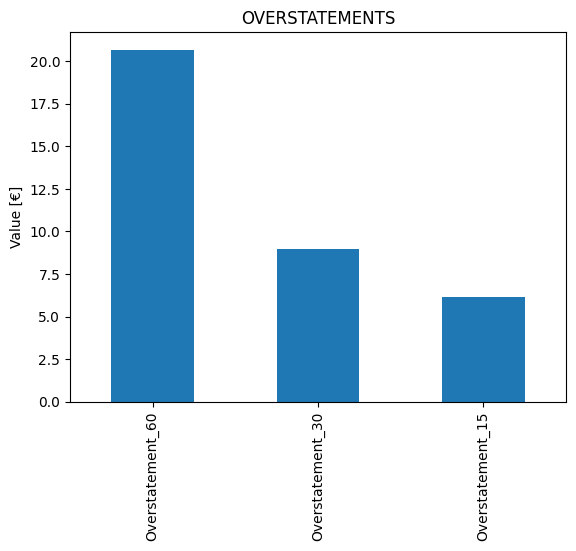

In [20]:
comparison_df[['Overstatement_60', 'Overstatement_30', 'Overstatement_15']].mean().plot(kind='bar', title='OVERSTATEMENTS', ylabel='Value [€]')

Text(0, 0.5, 'Shrinkage [%]')

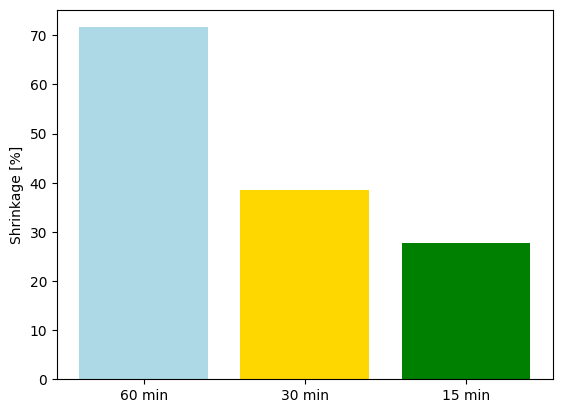

In [21]:
#comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean().plot(kind='bar', title='SHRINKAGE', ylabel='Value [-]')
comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean()

import matplotlib.pyplot as plt

# make a bar plot of shrinkage using matplotlib
plt.figure()
bars = plt.bar(['60 min', '30 min', '15 min'], comparison_df[['shrinkage_60', 'shrinkage_30', 'shrinkage_15']].mean()*100,
               color=['lightblue', 'gold', 'green'])
plt.ylabel('Shrinkage [%]')


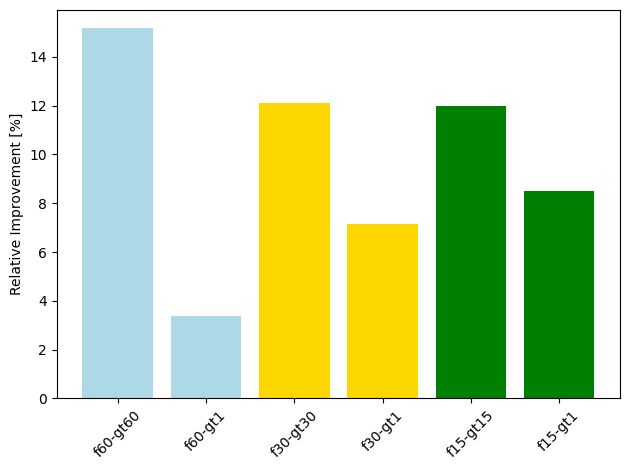

In [28]:
#comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15', 'rel_improv_diff_60', 'rel_improv_diff_30', 'rel_improv_diff_15']].mean().plot(kind='bar', title='RELATIVE IMPROVEMENTS', ylabel='Value [-]')
comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15']].mean()#.plot(kind='bar', title='RELATIVE IMPROVEMENTS', ylabel='Value [-]')

plt.figure()
bars = plt.bar(
    ['f60-gt60', 'f60-gt1', 'f30-gt30', 'f30-gt1', 'f15-gt15', 'f15-gt1'],
    comparison_df[['rel_gt60_improv_60', 'rel_gt1_improv_60', 'rel_gt30_improv_30', 'rel_gt1_improv_30', 'rel_gt15_improv_15', 'rel_gt1_improv_15']].mean()*100,
    color=['lightblue', 'lightblue', 'gold', 'gold', 'green', 'green']
)
plt.ylabel('Relative Improvement [%]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
comparison_df.mean()

diff_f60-gt60-c8      31.314069
diff_f60-gt1-c8       10.644530
diff_f30-gt30-c8      26.972952
diff_f30-gt1-c8       17.985074
diff_f15-gt15-c8      26.967554
diff_f15-gt1-c8       20.795656
Overstatement_60      20.669539
Overstatement_30       8.987878
Overstatement_15       6.171898
shrinkage_60           0.716272
shrinkage_30           0.385248
shrinkage_15           0.277759
rel_gt60_improv_60     0.151661
rel_gt1_improv_60      0.033583
rel_gt30_improv_30     0.121273
rel_gt1_improv_30      0.071473
rel_gt15_improv_15     0.119816
rel_gt1_improv_15      0.085133
rel_improv_diff_60     0.118078
rel_improv_diff_30     0.049800
rel_improv_diff_15     0.034683
dtype: float64

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import hashlib

def _stable_jitter(label: str, scale: float = 0.18) -> float:
    """Deterministic jitter in [-scale, +scale] based on a string label."""
    h = hashlib.md5(label.encode()).hexdigest()
    u = int(h[:8], 16) / 0xFFFFFFFF  # uniform in [0,1]
    return (u - 0.5) * 2 * scale

def plot_shrinkage_by_experiment(df: pd.DataFrame,
                                 experiments=(60, 30, 15),
                                 jitter=0.18,
                                 show_summary=True,
                                 summary_stat="median"):
    """
    Scatter: x = experiment category (60/30/15), y = shrinkage a = 1 - s.
    Colors = buildings. Deterministic horizontal jitter to avoid overlap.
    """
    df_ = df.reset_index().rename(columns={df.index.name or 'index': 'building'})

    rows = []
    order = []
    for i, e in enumerate(experiments):
        col = f'shrinkage_{e}'
        if col not in df_.columns:
            continue
        order.append(e)
        base = float(i)
        for _, r in df_.iterrows():
            val = r[col]
            if pd.isna(val):
                continue
            rows.append({
                "x": base ,#+ _stable_jitter(f"{r['building']}|{e}", scale=jitter),
                "x_base": base,
                "experiment": f"{e}-min",
                "building": r["building"],
                "shrinkage": float(val),
            })

    long_df = pd.DataFrame(rows)
    if long_df.empty:
        raise ValueError("No shrinkage_* columns found for the given experiments.")

    fig = px.scatter(
        long_df,
        x="x", y="shrinkage",
        color="building",
        hover_data={"building": True, "experiment": True, "shrinkage": ":.3f", "x": False, "x_base": False},
        title="Shrinkage of each building/experiment pair",
        labels={"shrinkage": "Shrinkage", "x": "Experiment"},
    )
    fig.update_traces(marker={"size": 10, "opacity": 0.9})

    # Put category ticks at 0,1,2… with labels 60/30/15
    tickvals = [float(i) for i, _ in enumerate(order)]
    ticktext = [f"{e}-min" for e in order]
    fig.update_xaxes(tickvals=tickvals, ticktext=ticktext, range=[-0.6, len(tickvals) - 0.4])

    # Reference lines
    fig.add_hline(y=1, line_dash="dot")  # full evaporation / reversal
    fig.add_hline(y=0, line_dash="dot")  # no shrinkage

    # Optional summary (median/mean) per experiment
    if show_summary:
        if summary_stat == "median":
            agg = long_df.groupby("x_base")["shrinkage"].median()
            label = "Median shrinkage"
        else:
            agg = long_df.groupby("x_base")["shrinkage"].mean()
            label = "Mean shrinkage"
        fig.add_trace(go.Scatter(
            x=agg.index, y=agg.values,
            mode="markers",
            marker=dict(symbol="x", size=14, line=dict(width=2), color="black"),
            name=label,
            hovertemplate=f"{label}: %{{y:.3f}}<extra></extra>"  # <-- escaped braces
        ))

    fig.update_layout(legend_title_text="Building", margin=dict(l=60, r=20, t=60, b=50), width=800, height=500)
    return fig, long_df

# usage:
fig, tidy = plot_shrinkage_by_experiment(comparison_df, summary_stat="mean")
fig.show()


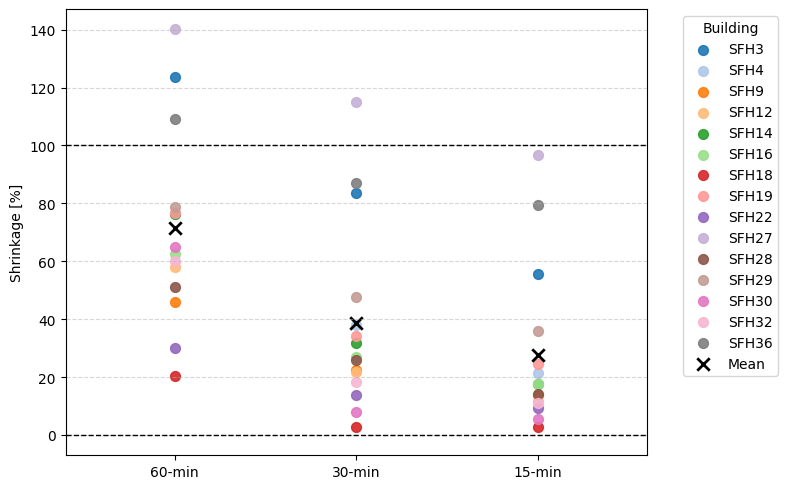

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hashlib

def _stable_jitter(label: str, scale: float = 0.18) -> float:
    """Deterministic jitter in [-scale, +scale] based on a string label."""
    h = hashlib.md5(label.encode()).hexdigest()
    u = int(h[:8], 16) / 0xFFFFFFFF
    return (u - 0.5) * 2 * scale

def plot_shrinkage_by_experiment_matplotlib(df: pd.DataFrame,
                                            experiments=(60, 30, 15),
                                            jitter=0.18,
                                            show_summary=True,
                                            summary_stat="median"):
    """
    Matplotlib version: scatter plot of shrinkage vs experiment.
    """
    df_ = df.reset_index().rename(columns={df.index.name or 'index': 'building'})
    rows, order = [], []

    for i, e in enumerate(experiments):
        col = f'shrinkage_{e}'
        if col not in df_.columns:
            continue
        order.append(e)
        base = float(i)
        for _, r in df_.iterrows():
            val = r[col] * 100
            if pd.isna(val):
                continue
            rows.append({
                "x": base ,#+ _stable_jitter(f"{r['building']}|{e}", scale=jitter),
                "x_base": base,
                "experiment": f"{e}-min",
                "building": r["building"],
                "shrinkage": float(val),
            })

    long_df = pd.DataFrame(rows)
    if long_df.empty:
        raise ValueError("No shrinkage_* columns found for the given experiments.")

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(8, 5))

    # Pick a color per building
    buildings = long_df['building'].unique()
    cmap = plt.get_cmap("tab20")
    colors = {b: cmap(i % 20) for i, b in enumerate(buildings)}

    # Scatter for each building
    for b in buildings:
        df_b = long_df[long_df['building'] == b]
        ax.scatter(df_b["x"], df_b["shrinkage"], label=b, color=colors[b], alpha=0.9, s=50)

    # Reference lines
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.axhline(100, color="black", linestyle="--", linewidth=1)

    # Optional summary
    if show_summary:
        if summary_stat == "median":
            agg = long_df.groupby("x_base")["shrinkage"].median()
            label = "Median"
        else:
            agg = long_df.groupby("x_base")["shrinkage"].mean()
            label = "Mean"
        ax.scatter(agg.index, agg.values,
                   marker="x", color="black", s=80, linewidths=2, label=label)

    # Formatting
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels([f"{e}-min" for e in order])
    ax.set_xlim(-0.6, len(order)-0.4)
    ax.set_ylabel("Shrinkage [%]")
    #ax.set_xlabel("Experiment")
    #ax.set_title("Shrinkage of each building/experiment pair")
    ax.legend(title="Building", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    plt.tight_layout()
    return fig, long_df


# --- Usage example ---
fig, tidy = plot_shrinkage_by_experiment_matplotlib(comparison_df, summary_stat="mean")
plt.show()


In [31]:
import pandas as pd
import plotly.express as px

def plot_shrinkage_vs_rel_improv(df: pd.DataFrame,
                                 experiments=(60, 30, 15),
                                 rel_fmt='rel_gt{e}_improv_{e}',
                                 shrink_fmt='shrinkage_{e}',
                                 compare_to_gt1=False):
    """
    df: DataFrame indexed by 'building' with columns like
        shrinkage_60, rel_gt60_improv_60, etc.
    experiments: which experiments to include (e.g., 60, 30, 15).
    rel_fmt / shrink_fmt: format strings for column names.
    """
    df_ = df.reset_index()  # bring 'building' out of index
    if compare_to_gt1:
        rel_fmt = 'rel_gt1_improv_{e}' #rel_fmt.replace('gt', 'gt1_')
        
    parts = []
    for e in experiments:
        rel_col = rel_fmt.format(e=e)
        shr_col = shrink_fmt.format(e=e)
        if rel_col not in df_.columns or shr_col not in df_.columns:
            # skip quietly if a column is missing
            continue
        tmp = df_[['building', shr_col, rel_col]].copy()
        tmp.columns = ['building', 'shrinkage', 'rel_improv']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True)
    long_df = long_df.dropna(subset=['shrinkage', 'rel_improv'])

    fig = px.scatter(
        long_df,
        x='shrinkage',               # a = 1 - s
        y='rel_improv',              # % savings vs B
        color='building',            # each building its own color
        symbol='experiment',         # symbol encodes experiment
        hover_data={
            'building': True,
            'experiment': True,
            'shrinkage': ':.3f',
            'rel_improv': ':.3%'     # show as %
        },
        labels={
            'shrinkage': 'Shrinkage (percentage of predicted edge that vanishes)',
            'rel_improv': 'Relative improvement of A vs B (share of B’s bill)'
        },
        title='Shrinkage vs Relative Improvement per Building and Experiment'
    )

    # Styling
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.update_yaxes(tickformat='.1%')       # percent ticks
    fig.add_vline(x=0, line_dash='dot')      # no attenuation
    fig.add_vline(x=1, line_dash='dot')      # full evaporation / reversal threshold
    fig.update_layout(
        legend_title_text='Building (color) & Experiment (symbol)',
        margin=dict(l=60, r=20, t=60, b=50),
        height=600,
        width=2400
    )
    return fig, long_df

# --- usage ---
fig, tidy = plot_shrinkage_vs_rel_improv(comparison_df, compare_to_gt1=True)  # df = your DataFrame
fig.show()


In [32]:
import pandas as pd
import numpy as np
import plotly.express as px

def plot_shrinkage_vs_true_abs(
    df: pd.DataFrame,
    experiments=(60, 30, 15),
    diff_true_fmt='diff_f{e}-gt1-c8',   # true Δ = B−A under realistic GT
    shrink_fmt='shrinkage_{e}'
):
    """
    Scatter: x = attenuation a = 1−s, y = true absolute improvement Δ_true (in €).
    """
    df_ = df.reset_index()  # bring 'building' out of the index
    parts = []
    for e in experiments:
        ycol = diff_true_fmt.format(e=e)
        xcol = shrink_fmt.format(e=e)
        if ycol not in df_.columns or xcol not in df_.columns:
            continue
        tmp = df_[['building', xcol, ycol]].copy()
        tmp.columns = ['building', 'shrinkage', 'abs_improv']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True).dropna(subset=['shrinkage', 'abs_improv'])

    fig = px.scatter(
        long_df, x='shrinkage', y='abs_improv',
        color='building', symbol='experiment',
        hover_data={'building': True, 'experiment': True, 'shrinkage': ':.3f', 'abs_improv': ':.2f'},
        labels={
            'shrinkage': 'Attenuation a = 1 − s (fraction of predicted edge that vanishes)',
            'abs_improv': 'True absolute improvement Δ_true = (B − A) [€]'
        },
        title='Attenuation vs True Absolute Improvement'
    )
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.add_vline(x=0, line_dash='dot')   # no attenuation
    fig.add_vline(x=1, line_dash='dot')   # full evaporation / reversal threshold
    fig.add_hline(y=0, line_dash='dot')   # A not better than B
    fig.update_yaxes(tickprefix='€', separatethousands=True)
    fig.update_layout(legend_title_text='Building (color) & Experiment (symbol)',
                      margin=dict(l=60, r=20, t=60, b=50))
    return fig, long_df

fig1, df1 = plot_shrinkage_vs_true_abs(comparison_df)
fig1.show()

In [33]:
def plot_shrinkage_vs_kept_percent(
    df: pd.DataFrame,
    experiments=(60, 30, 15),
    rel_true_fmt='rel_gt1_improv_{e}',   # % savings in reality
    rel_pred_fmt='rel_gt{e}_improv_{e}', # % savings in typical eval
    shrink_fmt='shrinkage_{e}',
    eps=1e-9
):
    """
    Scatter: x = attenuation a = 1−s, y = k = ρ_true / ρ_pred (share of percent-savings kept).
    """
    df_ = df.reset_index()
    parts = []
    for e in experiments:
        rt = rel_true_fmt.format(e=e)
        rp = rel_pred_fmt.format(e=e)
        xcol = shrink_fmt.format(e=e)
        if not all(c in df_.columns for c in [rt, rp, xcol]):
            continue
        tmp = df_[['building', xcol, rt, rp]].copy()
        tmp['kept_percent'] = np.where(tmp[rp].abs() >= eps, tmp[rt] / tmp[rp], np.nan)
        tmp = tmp[['building', xcol, 'kept_percent']]
        tmp.columns = ['building', 'shrinkage', 'kept_percent']
        tmp['experiment'] = f'{e}-min'
        parts.append(tmp)

    long_df = pd.concat(parts, ignore_index=True).dropna(subset=['shrinkage', 'kept_percent'])

    fig = px.scatter(
        long_df, x='shrinkage', y='kept_percent',
        color='building', symbol='experiment',
        hover_data={'building': True, 'experiment': True, 'shrinkage': ':.3f', 'kept_percent': ':.1%'},
        labels={
            'shrinkage': 'Attenuation a = 1 − s (fraction of predicted edge that vanishes)',
            'kept_percent': 'Kept percent of percent-savings k = ρ_true / ρ_pred'
        },
        title='Attenuation vs Kept Percent of Percent-Savings'
    )
    fig.update_traces(marker={'size': 10, 'opacity': 0.85})
    fig.add_vline(x=0, line_dash='dot')   # no attenuation
    fig.add_vline(x=1, line_dash='dot')   # full evaporation / reversal threshold
    fig.add_hline(y=1, line_dash='dot')   # no drop in percent-savings
    fig.add_hline(y=0, line_dash='dot')   # percent-savings vanish in reality
    fig.update_yaxes(tickformat='.0%')
    fig.update_layout(legend_title_text='Building (color) & Experiment (symbol)',
                      margin=dict(l=60, r=20, t=60, b=50))
    return fig, long_df

fig2, df2 = plot_shrinkage_vs_kept_percent(comparison_df)
fig2.show()

In [34]:
# comparison for individual buildings
print("Difference per building for f60-gt60-c8 vs f60-gt1-c8:")
print(comparison_df[['diff_f60-gt60-c8', 'diff_f60-gt1-c8', 'Overstatement_60']])

print("\n\nDifference per building for f30-gt30-c8 vs f30-gt1-c8:")
print(comparison_df[['diff_f30-gt30-c8', 'diff_f30-gt1-c8', 'Overstatement_30']])

print("\n\nDifference per building for f15-gt15-c8 vs f15-gt1-c8:")
print(comparison_df[['diff_f15-gt15-c8', 'diff_f15-gt1-c8', 'Overstatement_15']])

Difference per building for f60-gt60-c8 vs f60-gt1-c8:
          diff_f60-gt60-c8  diff_f60-gt1-c8  Overstatement_60
building                                                     
SFH3             30.665021        -7.219810         37.884831
SFH4             36.745090         8.663603         28.081487
SFH9             58.360213        31.632888         26.727324
SFH12            29.980272        12.560195         17.420077
SFH14            31.176752         7.383898         23.792854
SFH16            29.708213        11.133877         18.574336
SFH18            30.570487        24.294706          6.275781
SFH19            25.861591         5.989763         19.871827
SFH22            43.329507        30.351821         12.977686
SFH27            12.842192        -5.154658         17.996850
SFH28            44.773936        21.829775         22.944160
SFH29            20.143329         4.286167         15.857162
SFH30            14.795594         5.196066          9.599529
SFH32          

In [35]:
# diff_60 basically is the Overstatement
# Then implement Realized fraction aka shrinkage. How much does my advantage shrink?
# Then implement Relative Improvement. 
# First take the predicted improvement at same frequency between RB and Ideal-ConstGrid. Second, take the more realistic improvement between RB and Ideal-ConstGrid at GT frequency = 1min. 

In [36]:
comparison_df

,diff_f60-gt60-c8,diff_f60-gt1-c8,diff_f30-gt30-c8,diff_f30-gt1-c8,diff_f15-gt15-c8,diff_f15-gt1-c8,Overstatement_60,Overstatement_30,Overstatement_15,shrinkage_60,...,shrinkage_15,rel_gt60_improv_60,rel_gt1_improv_60,rel_gt30_improv_30,rel_gt1_improv_30,rel_gt15_improv_15,rel_gt1_improv_15,rel_improv_diff_60,rel_improv_diff_30,rel_improv_diff_15
building,,,,,,,,,,,,,,,,,,,,,
SFH3,30.665021,-7.219810,25.520497,4.195113,24.879469,11.023250,37.884831,21.325384,13.856219,1.235441,...,0.556934,0.184409,-0.041116,0.151129,0.023891,0.144747,0.062776,0.225525,0.127238,0.081970
SFH4,36.745090,8.663603,31.480566,19.490268,31.217903,24.586249,28.081487,11.990297,6.631654,0.764224,...,0.212431,0.162816,0.036886,0.137852,0.082981,0.134985,0.104678,0.125930,0.054870,0.030308
SFH9,58.360213,31.632888,55.631859,43.126586,55.536930,47.870990,26.727324,12.505273,7.665940,0.457972,...,0.138033,0.110763,0.058649,0.104777,0.079958,0.103956,0.088755,0.052114,0.024818,0.015202
SFH12,29.980272,12.560195,27.081867,21.200851,27.086731,23.888448,17.420077,5.881016,3.198283,0.581051,...,0.118076,0.118817,0.047354,0.105426,0.079930,0.103960,0.090063,0.071463,0.025496,0.013898
SFH14,31.176752,7.383898,25.352764,17.253514,25.435709,20.979191,23.792854,8.099250,4.456518,0.763160,...,0.175207,0.232426,0.052152,0.186021,0.121861,0.183763,0.148175,0.180274,0.064161,0.035588
SFH16,29.708213,11.133877,23.913256,17.431970,23.996001,19.802525,18.574336,6.481286,4.193476,0.625226,...,0.174757,0.129441,0.046912,0.103291,0.073449,0.102760,0.083438,0.082529,0.029842,0.019323
SFH18,30.570487,24.294706,28.274138,27.474748,28.342805,27.585778,6.275781,0.799390,0.757027,0.205289,...,0.026710,0.099897,0.076989,0.091642,0.087066,0.091224,0.087418,0.022908,0.004576,0.003806
SFH19,25.861591,5.989763,20.983630,13.820081,21.244485,16.018844,19.871827,7.163550,5.225642,0.768392,...,0.245976,0.259148,0.055789,0.206402,0.128722,0.204538,0.149202,0.203359,0.077680,0.055336
SFH22,43.329507,30.351821,40.958079,35.243017,41.082478,37.311476,12.977686,5.715063,3.771002,0.299512,...,0.091791,0.092563,0.063835,0.087136,0.074122,0.087043,0.078472,0.028728,0.013014,0.008571


In [37]:
diff_f60_gt60_c8['diff']

building
SFH3     30.665021
SFH4     36.745090
SFH9     58.360213
SFH12    29.980272
SFH14    31.176752
SFH16    29.708213
SFH18    30.570487
SFH19    25.861591
SFH22    43.329507
SFH27    12.842192
SFH28    44.773936
SFH29    20.143329
SFH30    14.795594
SFH32    29.202014
SFH36    31.556827
Name: diff, dtype: float64

In [38]:
diff_f60_gt1_c8['diff']

building
SFH3     -7.219810
SFH4      8.663603
SFH9     31.632888
SFH12    12.560195
SFH14     7.383898
SFH16    11.133877
SFH18    24.294706
SFH19     5.989763
SFH22    30.351821
SFH27    -5.154658
SFH28    21.829775
SFH29     4.286167
SFH30     5.196066
SFH32    11.631117
SFH36    -2.911465
Name: diff, dtype: float64

In [39]:
mre.df.columns

Index(['path', 'timestamp', 'model', 'freq', 'building', 't_start', 't_end',
       'total_timespan', 'import_cost', 'export_revenue', 'net_cost',
       'net_cost_adj', 'import_squared', 'export_squared',
       'e_discharged_total', 'battery_deg_costs', 'net_cost_final', 'count',
       'mss_kw2', 'rms_kw', 'q95_abs_kw', 'pmax_import_kw', 'pmax_export_kw',
       'exceed_frac', 'exceed_hours', 'threshold_kw', 'e_end',
       'pg_import_total', 'pg_export_total', 'e_export_total',
       'e_import_total', 'e_throughput', 'e_battery_deg_costs', 'steps',
       'solver_fails', 'solver_fail_count', 'solver_fail_pct',
       'solver_top_errors', 'solver_status_mix'],
      dtype='object')

In [40]:
cols_to_show=["model", "t_start", 'import_squared', 'export_squared', 'count', 'mss_kw2',
       'rms_kw', 'q95_abs_kw', 'pmax_import_kw', 'pmax_export_kw',
       'exceed_frac', 'exceed_hours', 'threshold_kw']

#mre.df[cols_to_show]
mre.leaderboard(by="mss_kw2", cols_to_show=cols_to_show)


🏢 Building: SFH3


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,134061.568723,265388.055770,220306,1.767037,1.329299,3.122414,6.669995,6.261165,0.049885,183.166667,3.122414
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,147014.044435,283084.002230,220306,1.896793,1.377241,3.300426,7.369628,5.897717,0.049926,183.316667,3.300426
2,ideal_rule,2020-07-20 04:00:00+00:00,219053.332704,288499.335130,220306,1.956654,1.398804,3.207129,9.078233,6.838311,0.050003,183.600000,3.207129
3,mpc_det_rule,2020-07-20 04:00:00+00:00,241188.204196,294177.416194,220306,2.077695,1.441421,3.246452,10.036072,6.689625,0.050003,183.600000,3.246452
4,ideal,2020-07-20 04:00:00+00:00,288095.476690,342237.952837,220306,2.267640,1.505869,3.333736,8.887746,6.918924,0.050003,183.600000,3.333736
5,rule-based,2020-07-20 04:00:00+00:00,263971.946443,371937.622906,220306,2.456717,1.567392,4.266957,8.350652,6.397265,0.050003,183.600000,4.266957



🏢 Building: SFH4


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,193549.607362,288992.962649,220306,2.145642,1.464801,3.413110,6.052420,6.338566,0.049985,183.533333,3.413110
1,ideal_rule,2020-07-20 04:00:00+00:00,244484.461278,316519.091025,220306,2.292769,1.514189,3.501232,8.789813,6.952912,0.050003,183.600000,3.501232
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,183867.835746,357534.339410,220306,2.399956,1.549179,3.626718,8.134169,6.356957,0.049853,183.050000,3.626718
3,mpc_det_rule,2020-07-20 04:00:00+00:00,254455.584077,359732.207067,220306,2.511688,1.584831,3.565406,9.802575,7.119912,0.050003,183.600000,3.565406
4,rule-based,2020-07-20 04:00:00+00:00,195852.115255,432530.002232,220306,2.570387,1.603243,4.277344,8.144977,7.107643,0.050003,183.600000,4.277344
5,ideal,2020-07-20 04:00:00+00:00,304189.840018,370572.202867,220306,2.610869,1.615818,3.591416,10.041451,7.060066,0.050003,183.600000,3.591416



🏢 Building: SFH9


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,365450.961290,299388.721342,220306,2.951377,1.717957,3.846997,10.984856,6.943101,0.049958,183.433333,3.846997
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,374685.965381,349933.374932,220306,3.199220,1.788636,3.923567,11.038475,7.133590,0.049890,183.183333,3.923567
2,ideal_rule,2020-07-20 04:00:00+00:00,433525.051546,353477.366573,220306,3.247988,1.802217,4.143326,10.984856,7.864635,0.050003,183.600000,4.143326
3,rule-based,2020-07-20 04:00:00+00:00,335049.819125,476182.138133,220306,3.386634,1.840281,4.467031,10.984856,8.484696,0.050003,183.600000,4.467031
4,ideal,2020-07-20 04:00:00+00:00,479813.640855,407753.692669,220306,3.491967,1.868680,4.166864,14.142992,7.968981,0.050003,183.600000,4.166864
5,mpc_det_rule,2020-07-20 04:00:00+00:00,469791.167476,384310.954736,220306,3.536711,1.880614,4.239865,14.186291,8.013579,0.050003,183.600000,4.239865



🏢 Building: SFH12


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,116690.089761,105446.178156,220306,0.979713,0.989805,2.436428,6.109779,5.558620,0.049953,183.416667,2.436428
1,ideal_rule,2020-07-20 04:00:00+00:00,145424.457098,105426.980837,220306,1.008156,1.004070,2.432758,8.063375,5.404915,0.050003,183.600000,2.432758
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,120466.783689,127181.615121,220306,1.083269,1.040802,2.438960,7.525620,5.117637,0.050003,183.600000,2.438960
3,rule-based,2020-07-20 04:00:00+00:00,145936.166580,133262.358949,220306,1.093262,1.045592,2.748308,7.525620,4.985782,0.050003,183.600000,2.748308
4,mpc_det_rule,2020-07-20 04:00:00+00:00,172061.661551,118540.373756,220306,1.166509,1.080050,2.574053,8.050487,5.529778,0.050003,183.600000,2.574053
5,ideal,2020-07-20 04:00:00+00:00,217768.204545,167277.750842,220306,1.407142,1.186230,2.657197,8.069364,5.949460,0.050003,183.600000,2.657197



🏢 Building: SFH14


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,121931.151317,321642.349310,220306,1.971805,1.404210,3.339810,6.225881,5.883551,0.049976,183.5,3.339810
1,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,130970.194263,316012.219923,220306,1.987374,1.409743,3.315491,6.225881,6.670110,0.050003,183.6,3.315491
2,ideal_rule,2020-07-20 04:00:00+00:00,157015.011488,338749.927636,220306,2.062479,1.436133,3.353154,6.225881,7.315677,0.050003,183.6,3.353154
3,mpc_det_rule,2020-07-20 04:00:00+00:00,159917.694891,343835.552941,220306,2.090251,1.445770,3.350376,12.007655,7.326414,0.050003,183.6,3.350376
4,rule-based,2020-07-20 04:00:00+00:00,115750.348887,427146.714301,220306,2.264074,1.504684,4.026143,11.043059,6.840115,0.050003,183.6,4.026143
5,ideal,2020-07-20 04:00:00+00:00,198254.708371,376448.099993,220306,2.273334,1.507758,3.412831,8.221210,7.391690,0.050003,183.6,3.412831



🏢 Building: SFH16


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,165482.897446,190694.149818,220306,1.408902,1.186972,2.797444,13.605231,5.038605,0.050003,183.600000,2.797444
1,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,163748.821293,177801.446638,220306,1.506507,1.227398,3.051671,8.605231,5.536911,0.049917,183.283333,3.051671
2,ideal_rule,2020-07-20 04:00:00+00:00,192129.869942,178865.272474,220306,1.525899,1.235273,2.942260,13.070909,6.043270,0.050003,183.600000,2.942260
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,156605.424358,193541.602691,220306,1.538641,1.240420,2.940016,11.327007,5.200686,0.049822,182.933333,2.940016
4,mpc_det_rule,2020-07-20 04:00:00+00:00,202822.165912,184654.047062,220306,1.592330,1.261875,2.964390,13.503209,5.958439,0.050003,183.600000,2.964390
5,ideal,2020-07-20 04:00:00+00:00,233299.988590,218203.705305,220306,1.731380,1.315819,3.063426,13.037785,7.307050,0.050003,183.600000,3.063426



🏢 Building: SFH18


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,109827.414065,47454.059435,220306,0.592449,0.769707,1.815746,12.018303,3.111441,0.050003,183.60,1.815746
1,mpc_det_rule,2020-07-20 04:00:00+00:00,140865.499321,37437.877779,220306,0.724157,0.850974,1.948931,7.216108,4.197229,0.050003,183.60,1.948931
2,ideal_rule,2020-07-20 04:00:00+00:00,135327.491773,43431.283607,220306,0.738935,0.859613,2.021192,7.018303,4.521952,0.050003,183.60,2.021192
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,115150.395961,55133.602897,220306,0.742144,0.861478,2.096436,7.018303,4.077259,0.049813,182.90,2.096436
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,127852.185156,54345.463224,220306,0.798827,0.893771,2.132738,7.018303,4.352745,0.049799,182.85,2.132738
5,ideal,2020-07-20 04:00:00+00:00,181506.628812,84631.049599,220306,0.979507,0.989700,2.235121,9.861420,4.737077,0.050003,183.60,2.235121



🏢 Building: SFH19


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,93503.873789,286471.336665,220306,1.694737,1.301821,3.045869,4.115787,6.196304,0.049844,183.016667,3.045869
1,ideal_rule,2020-07-20 04:00:00+00:00,113199.980058,320558.733590,220306,1.768291,1.329771,3.149656,6.079162,6.953435,0.050003,183.600000,3.149656
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,89551.728588,316115.134633,220306,1.805539,1.343703,3.150398,4.869183,6.512900,0.050003,183.600000,3.150398
3,mpc_det_rule,2020-07-20 04:00:00+00:00,116849.504473,341740.944677,220306,1.874052,1.368960,3.210287,5.861864,7.454564,0.050003,183.600000,3.210287
4,ideal,2020-07-20 04:00:00+00:00,148652.446587,347023.730208,220306,1.914826,1.383772,3.178012,5.133991,7.031700,0.050003,183.600000,3.178012
5,rule-based,2020-07-20 04:00:00+00:00,94299.733064,441418.088398,220306,2.204267,1.484677,4.100472,5.729236,7.788875,0.050003,183.600000,4.100472



🏢 Building: SFH22


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,211615.104177,71019.213769,220306,1.076077,1.037341,2.477982,5.411646,4.169920,0.050003,183.600000,2.477982
1,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,225333.821027,74260.721516,220306,1.329572,1.153071,2.659200,4.961060,4.780878,0.049958,183.433333,2.659200
2,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,248621.033033,63037.717648,220306,1.383968,1.176422,2.777077,5.747354,4.683557,0.049862,183.083333,2.777077
3,ideal_rule,2020-07-20 04:00:00+00:00,290703.860732,59601.627642,220306,1.445727,1.202384,2.927043,6.491716,5.041590,0.050003,183.600000,2.927043
4,mpc_det_rule,2020-07-20 04:00:00+00:00,294191.626762,61593.561543,220306,1.453203,1.205489,2.901787,7.386231,5.339480,0.050003,183.600000,2.901787
5,ideal,2020-07-20 04:00:00+00:00,340196.434938,96780.454856,220306,1.664639,1.290209,2.991530,7.711676,5.171795,0.050003,183.600000,2.991530



🏢 Building: SFH27


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,51877.904312,137554.662560,220306,0.706161,0.840334,2.228872,2.977903,4.091693,0.050003,183.60,2.228872
1,mpc_det_rule,2020-07-20 04:00:00+00:00,61127.515458,163298.011463,220306,0.900707,0.949056,2.295244,4.430229,6.416520,0.050003,183.60,2.295244
2,ideal_rule,2020-07-20 04:00:00+00:00,59743.388458,170971.513047,220306,0.935218,0.967067,2.446438,4.321391,6.405686,0.050003,183.60,2.446438
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,37858.166380,185593.496211,220306,0.992828,0.996407,2.596251,3.623462,5.465516,0.050003,183.60,2.596251
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,44147.075706,189967.449920,220306,1.037680,1.018666,2.697672,3.160589,6.049496,0.049935,183.35,2.697672
5,ideal,2020-07-20 04:00:00+00:00,93397.563405,209967.339725,220306,1.122563,1.059511,2.756552,4.321390,6.469646,0.050003,183.60,2.756552



🏢 Building: SFH28


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,206356.515141,142107.552218,220306,1.544611,1.242824,2.846236,4.823242,6.457486,0.049985,183.533333,2.846236
1,rule-based,2020-07-20 04:00:00+00:00,234038.637991,172657.917822,220306,1.583260,1.258277,2.951199,7.693428,5.484760,0.050003,183.600000,2.951199
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,214994.711004,168281.612744,220306,1.691513,1.300582,2.972327,6.440728,5.797090,0.049853,183.050000,2.972327
3,ideal_rule,2020-07-20 04:00:00+00:00,272952.012722,148702.898642,220306,1.718963,1.311092,3.074581,8.260178,6.738839,0.050003,183.600000,3.074581
4,mpc_det_rule,2020-07-20 04:00:00+00:00,296582.074984,157438.261943,220306,1.851846,1.360826,3.178365,8.860437,7.196646,0.050003,183.600000,3.178365
5,ideal,2020-07-20 04:00:00+00:00,323633.944824,202563.033014,220306,1.975991,1.405699,3.101519,8.565097,6.835988,0.050003,183.600000,3.101519



🏢 Building: SFH29


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,76968.497878,118824.447697,220306,0.743150,0.862061,2.208869,8.113452,3.913651,0.050003,183.600000,2.208869
1,mpc_det_rule,2020-07-20 04:00:00+00:00,91543.462190,141477.120854,220306,0.950851,0.975116,2.381438,8.113452,6.126290,0.050003,183.600000,2.381438
2,ideal_rule,2020-07-20 04:00:00+00:00,86802.879742,147114.079992,220306,0.964071,0.981871,2.442641,5.860338,6.172175,0.050003,183.600000,2.442641
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,64888.494289,170490.028614,220306,1.042413,1.020986,2.577090,8.113452,5.476736,0.049990,183.550000,2.577090
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,71830.650111,165671.275908,220306,1.052260,1.025797,2.642604,5.003077,5.878379,0.049967,183.466667,2.642604
5,ideal,2020-07-20 04:00:00+00:00,119808.268458,186490.852111,220306,1.174535,1.083760,2.684406,5.874533,6.267225,0.050003,183.600000,2.684406



🏢 Building: SFH30


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,51786.343214,83896.182080,220306,0.533633,0.730502,2.010592,4.432862,3.558607,0.050003,183.600000,2.010592
1,ideal_rule,2020-07-20 04:00:00+00:00,48633.335152,92722.301089,220306,0.596635,0.772421,1.821518,6.599063,5.611537,0.050003,183.600000,1.821518
2,mpc_det_rule,2020-07-20 04:00:00+00:00,53472.931958,94881.063683,220306,0.618252,0.786290,1.790748,5.948571,5.790113,0.050003,183.600000,1.790748
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,39785.632322,124221.105676,220306,0.723161,0.850389,1.904910,5.945655,5.300750,0.049980,183.516667,1.904910
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,43712.758315,120977.462740,220306,0.727693,0.853050,2.044761,3.522962,5.514492,0.049867,183.100000,2.044761
5,ideal,2020-07-20 04:00:00+00:00,79917.168852,141988.505666,220306,0.858475,0.926539,2.169626,6.628522,5.968008,0.050003,183.600000,2.169626



🏢 Building: SFH32


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,114271.578741,198708.030949,220306,1.389027,1.178570,2.749046,7.544024,6.510742,0.050003,183.600000,2.749046
1,ideal_rule,2020-07-20 04:00:00+00:00,134177.364133,208645.343727,220306,1.425571,1.193973,2.772935,7.573416,6.875544,0.050003,183.600000,2.772935
2,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,113503.467160,224740.049766,220306,1.496444,1.223292,2.893232,6.783287,6.444770,0.049890,183.183333,2.893232
3,rule-based,2020-07-20 04:00:00+00:00,119505.840029,250043.782808,220306,1.513881,1.230399,3.200289,7.898665,6.129238,0.050003,183.600000,3.200289
4,mpc_det_rule,2020-07-20 04:00:00+00:00,150463.531808,225187.763607,220306,1.564603,1.250841,2.852946,9.473826,7.091146,0.050003,183.600000,2.852946
5,ideal,2020-07-20 04:00:00+00:00,174949.897516,247892.706458,220306,1.659668,1.288281,2.876878,8.240474,7.400638,0.050003,183.600000,2.876878



🏢 Building: SFH36


,model,t_start,import_squared,export_squared,count,mss_kw2,rms_kw,q95_abs_kw,pmax_import_kw,pmax_export_kw,exceed_frac,exceed_hours,threshold_kw
0,rule-based,2020-07-20 04:00:00+00:00,338530.432674,95887.419334,220306,1.335058,1.155447,2.712489,7.953287,3.855759,0.050003,183.600000,2.712489
1,mpc_det_rule,2020-07-20 04:00:00+00:00,327812.716244,88040.507978,220306,1.451099,1.204616,2.848602,8.996977,5.739197,0.050003,183.600000,2.848602
2,ideal_rule,2020-07-20 04:00:00+00:00,316511.760079,101196.529831,220306,1.474373,1.214238,2.893661,8.639901,5.992319,0.050003,183.600000,2.893661
3,mpc_det_rule_constGrid,2020-07-20 04:00:00+00:00,211686.488226,124550.756574,220306,1.487025,1.219436,3.146691,8.132684,4.877249,0.049831,182.966667,3.146691
4,ideal_rule_constGrid,2020-07-20 04:00:00+00:00,211632.071264,127345.247522,220306,1.502699,1.225846,3.044752,7.123390,5.736994,0.049999,183.583333,3.044752
5,ideal,2020-07-20 04:00:00+00:00,380672.421181,163263.229010,220306,1.734439,1.316981,3.101146,8.725151,6.157656,0.050003,183.600000,3.101146


In [41]:
mre.pivot()

TypeError: MultiRunEvaluator.pivot() missing 1 required positional argument: 'models'

In [ ]:
mre.failure_table()

,model,building,freq,t_start,t_end,steps,solver_fail_count,solver_fail_pct,solver_status_mix,solver_top_errors,path
0,ideal,SFH9,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,60,0.005952,error1:60,fallback_decision:60,../runs/2025-08-22_13-36/SFH9/logs_2025-08-22_...
1,rule-based,SFH4,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH4/logs_2025-08-22_...
2,ideal,SFH4,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH4/logs_2025-08-22_...
3,rule-based,SFH9,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH9/logs_2025-08-22_...
4,ideal,SFH10,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH10/logs_2025-08-22...
5,rule-based,SFH10,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH10/logs_2025-08-22...
6,rule-based,SFH18,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH18/logs_2025-08-22...
7,ideal,SFH18,60,2020-06-08 04:00:00+00:00,2020-06-15 03:59:00+00:00,10080,0,0.000000,,,../runs/2025-08-22_13-36/SFH18/logs_2025-08-22...


In [ ]:
# dtype error => solver error
time_of_executions = ["2025-08-26_10-20", "2025-08-26_10-21"]
csvs = [p for t in time_of_executions for p in Path("../runs").rglob(f"logs_{t}*.csv")]
csvs[1]
df = pd.read_csv(csvs[5])
cols = df.columns
print("Column #9 is:", cols[9])
cols

## Test the evaluation class

In [ ]:
run_path = Path('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv')
run_path_rb = Path('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')

prices_path = Path('../../01_data/price_data/electricity_price_estimation.csv')
prices_path_const = Path('../../01_data/price_data/const_prices_testing.csv')
ev1 = Evaluator(run_path, prices_path)
ev1.get_costs()


KeyboardInterrupt



In [ ]:
ev2 = Evaluator(run_path_rb, prices_path)
ev2.get_costs()

{'import_cost': 0.0,
 'export_revenue': 2.186811788658414,
 'net_cost': -2.186811788658414}

In [ ]:
ev1.get_df()

,action,pb_low,pb_high,pg,gt,soe_now,soe_new,import_price,export_price,costs_buy,costs_sell,cashflow
timestamp,,,,,,,,,,,,
2020-05-13 07:00:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.511872,-2.834009,4.000000,4.076507,0.1139,0.0465,0.0,0.116802,-0.116802
2020-05-13 07:15:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.557424,-2.879560,4.076507,4.153015,0.1139,0.0465,0.0,0.118920,-0.118920
2020-05-13 07:30:00+00:00,-0.322137,-0.322137,-1.201852e-07,-2.854330,-3.176466,4.153015,4.229522,0.1139,0.0465,0.0,0.132726,-0.132726
2020-05-13 07:45:00+00:00,-0.322137,-0.322137,-1.201852e-07,-3.387559,-3.709695,4.229522,4.306030,0.1139,0.0465,0.0,0.157521,-0.157521
2020-05-13 08:00:00+00:00,0.655249,0.655249,1.088511e+00,-4.045914,-3.390665,4.306030,4.133596,0.1138,0.0465,0.0,0.188135,-0.188135
2020-05-13 08:15:00+00:00,0.655249,0.655249,1.088511e+00,-4.228103,-3.572853,4.133596,3.961162,0.1138,0.0465,0.0,0.196607,-0.196607
2020-05-13 08:30:00+00:00,0.655249,0.655249,1.088511e+00,-5.395369,-4.740119,3.961162,3.788728,0.1138,0.0465,0.0,0.250885,-0.250885
2020-05-13 08:45:00+00:00,0.655249,0.655249,1.088511e+00,-5.698039,-5.042790,3.788728,3.616294,0.1138,0.0465,0.0,0.264959,-0.264959
2020-05-13 09:00:00+00:00,-0.556352,-0.556352,-1.791756e-06,-4.561881,-5.118234,3.616294,3.748427,0.1094,0.0448,0.0,0.204372,-0.204372


In [ ]:
ev1.plot_battery_soe(max_soe=8.0)

In [ ]:
ev2.plot_battery_soe(max_soe=8.0)

## Test Multi-Run Evaluator

In [ ]:
path1 = Path('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv')
path2 = Path('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')

path_list = [path1, path2]

mre = MultiRunEvaluator(path_list)

self.run_paths: [WindowsPath('../runs/logs_2025-08-11_08-40_op-interval_freq-60_building-SFH3.csv'), WindowsPath('../runs/logs_2025-08-11_08-40_op-rule-based_freq-60_building-SFH3.csv')]


In [ ]:
mre.leaderboard(by="net_cost")

,model,building,freq,t_start,t_end,net_cost
0,interval,SFH3,60,2020-05-13 07:00:00+00:00,2020-05-13 09:45:00+00:00,-2.344862
1,rule-based,SFH3,60,2020-05-13 07:00:00+00:00,2020-05-13 09:45:00+00:00,-2.186812


In [ ]:
mre.pivot()

model,interval,rule-based
freq,60,60
building,,
SFH3,-2.344862,-2.186812
